In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

import scienceplots
import shutup

from joblib import Parallel, delayed

from lib import data, spks_utils, fitlvm_utils, fit_models, eval_models, models, utils

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
# pretty plots
plt.style.use(['nature'])
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

# seed and suppress warnings :-)
fit_models.seed()
shutup.please()

In [3]:
das_00 = np.load('vars/das_00_latents.npy', allow_pickle=True)
das_01 = np.load('vars/das_01_latents.npy', allow_pickle=True)
das_02 = np.load('vars/das_02_latents.npy', allow_pickle=True)
das_03 = np.load('vars/das_03_latents.npy', allow_pickle=True)
das_04 = np.load('vars/das_04_latents.npy', allow_pickle=True)

In [4]:
das = [das_00, das_01, das_02, das_03, das_04]

## Predicted Traces

In [6]:
trial_data_all = np.load("vars/trial_data_all_MM012_MM013_5sess.npz", allow_pickle=True)['arr_0']
session_data_all = np.load("vars/session_data_all_MM012_MM013_5sess.npy", allow_pickle=True)
unit_spike_times_all = np.load("vars/unit_spike_times_all_MM012_MM013_5sess.npy", allow_pickle=True)
regions_all = np.load("vars/regions_all.npy", allow_pickle=True)
subj_idx = 0; sess_idx = 3

unit_spike_times = unit_spike_times_all[subj_idx][sess_idx]
trial_data = trial_data_all[subj_idx][sess_idx]
session_data = session_data_all[subj_idx][sess_idx]
regions = regions_all[subj_idx][sess_idx]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# get session data
psths, _, _, _, _, _, mask = data.get_psths(unit_spike_times, trial_data, session_data, regions, 
                                tpre=0.5, tpost=0.5, binwidth_ms=25, alignment='choice', 
                            balance=True, reward_only=False, do_rem_zstd=True, shuffle=False, prev_filter=False)
trial_data = trial_data[mask]
    
data_gd, train_dl, val_dl, test_dl, train_inds, val_inds, test_inds, Mtrain, Mtest, sample, num_trials, num_tv, num_units = fitlvm_utils.get_data_model(psths, trial_data, regions, norm=False, num_tents=2, task_vars=['response', 'rewarded', 'response_prev', 'rewarded_prev'])

0 291 96 16
originally 186 units
good units 186
403 Trials, 186 Neurons


as expected


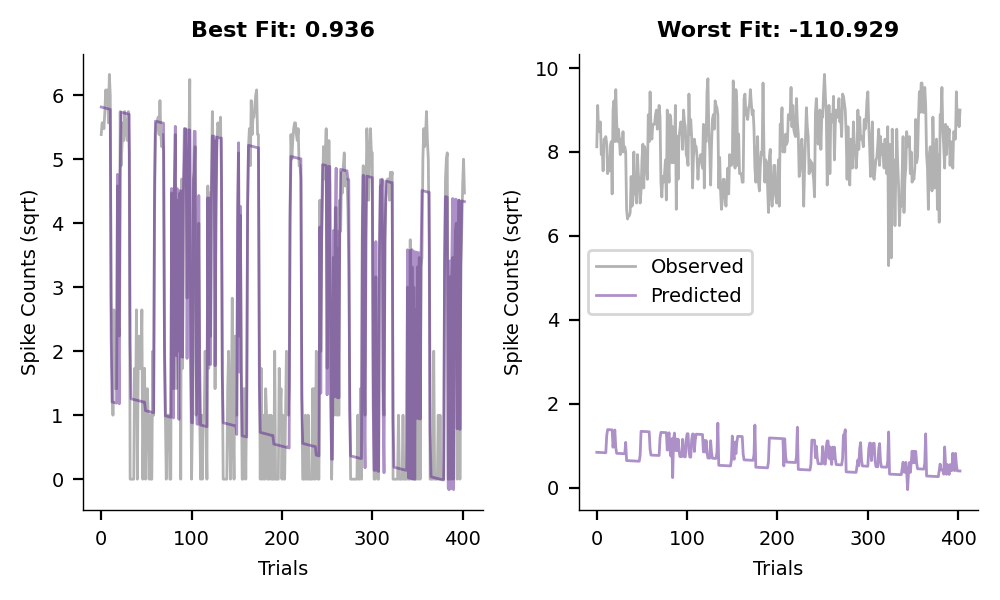

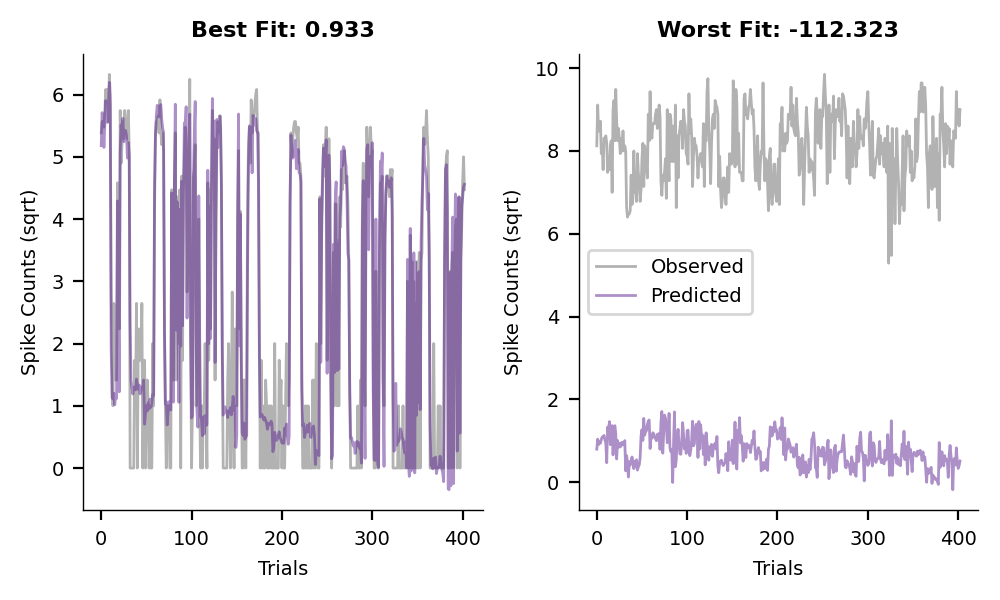

In [10]:
res_tv = fitlvm_utils.eval_model(das_03[3]['tv']['model'], data_gd, test_dl.dataset, do_plot=True, save=False)
res_affine = fitlvm_utils.eval_model(das_03[3]['affine']['model'], data_gd, test_dl.dataset, do_plot=True, save=False)

## WEIRD

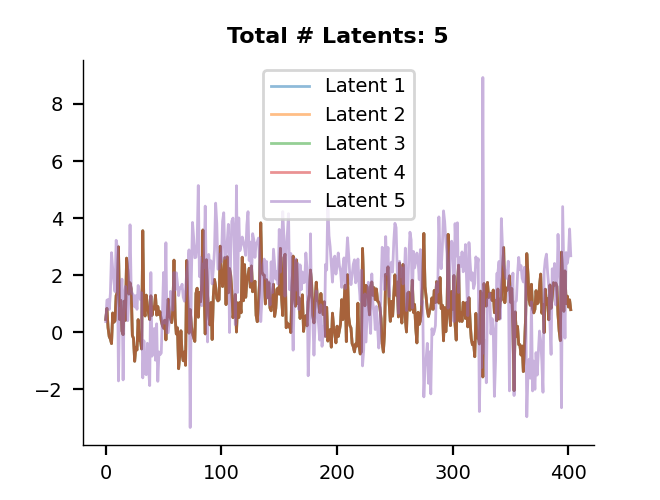

In [13]:
plt.figure()
model = das_03[4]['affine']
weights = model['model'].gain_mu.get_weights()
for ax in range(5):
    plt.plot(weights[:,ax], alpha=0.5, label=f"Latent {ax+1}")
plt.title(f"Total # Latents: 5")
plt.legend()

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


[<Figure size 800x800 with 1 Axes>]

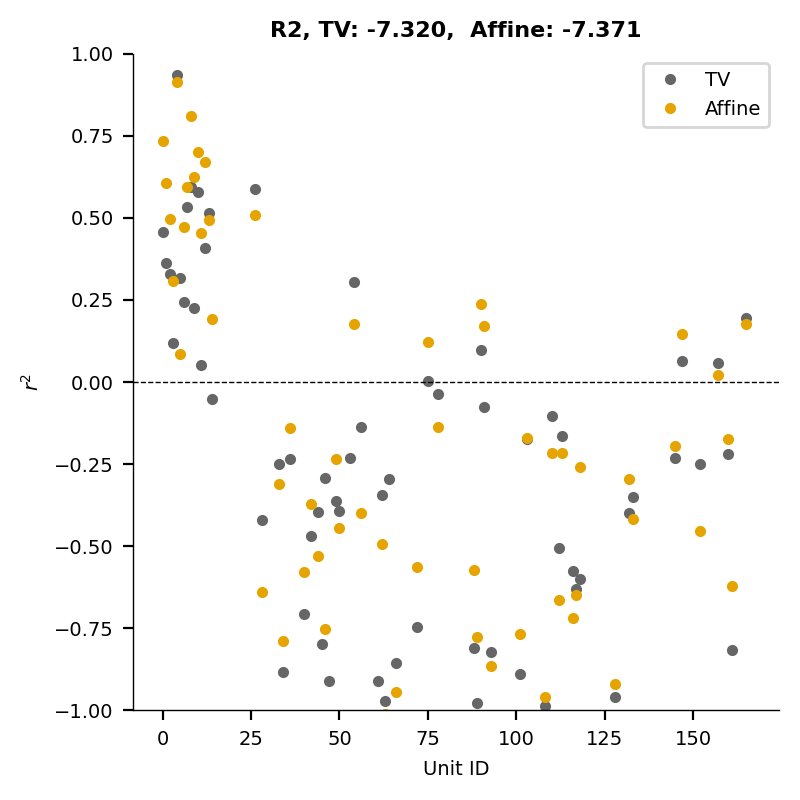

In [9]:
fitlvm_utils.plot_r2_comp([], res_tv, res_affineae, label_a="TV", label_b="Affine", save=False)

## Num Latents

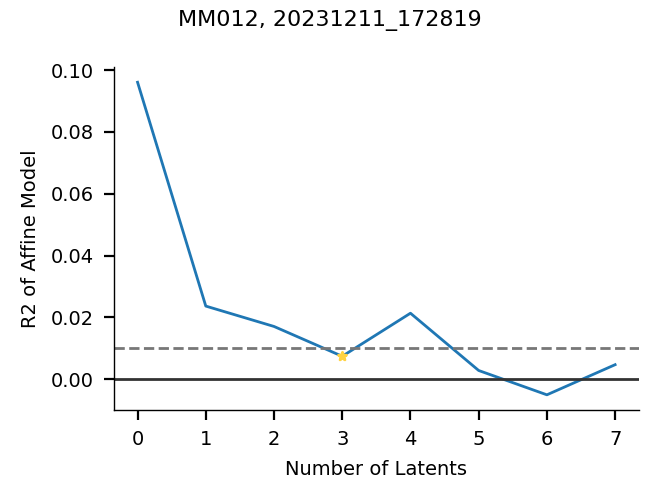

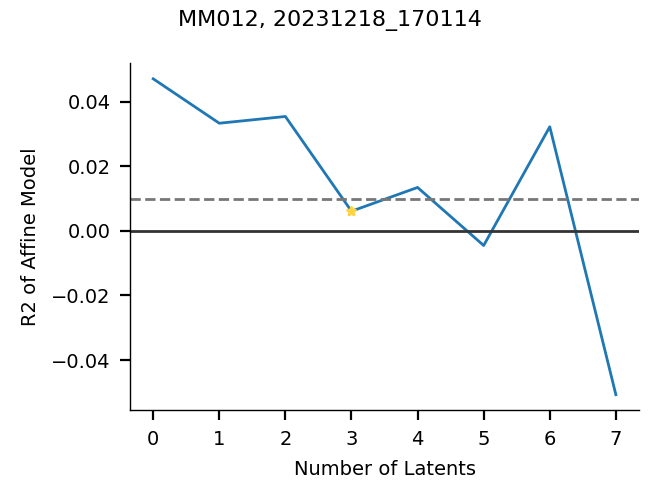

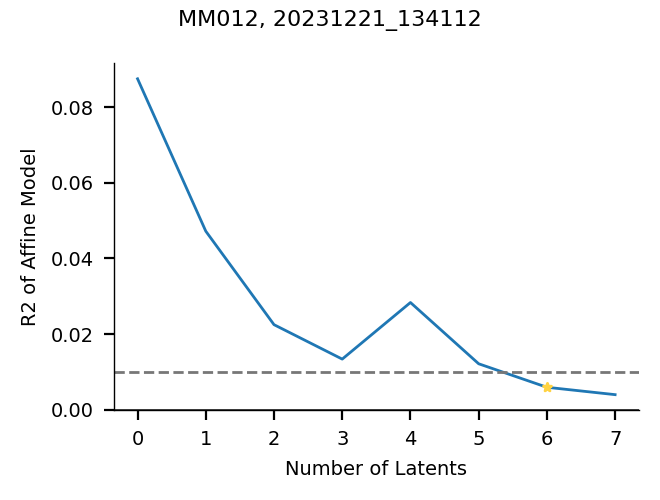

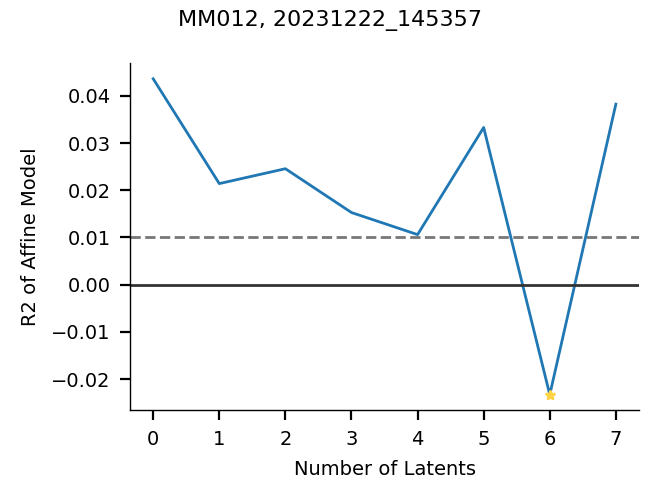

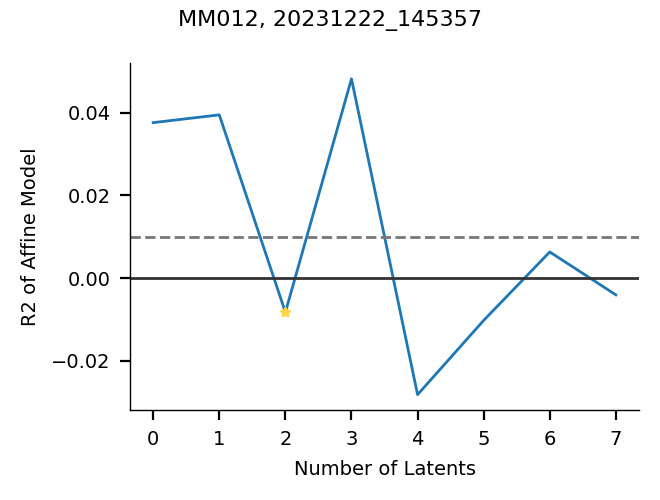

In [46]:
eval_models.plot_r2_latents_diff(das_00, subj_idx=0, sess_idx=0, is_msess=False)
eval_models.plot_r2_latents_diff(das_01, subj_idx=0, sess_idx=1, is_msess=False)
eval_models.plot_r2_latents_diff(das_02, subj_idx=0, sess_idx=2, is_msess=False)
eval_models.plot_r2_latents_diff(das_03, subj_idx=0, sess_idx=3, is_msess=False)
eval_models.plot_r2_latents_diff(das_04, subj_idx=0, sess_idx=3, is_msess=False)

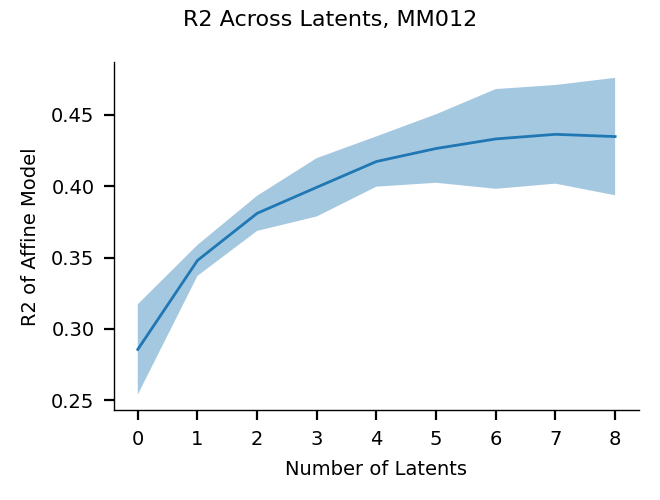

In [11]:
eval_models.plot_r2_latents_summary(das, subj_idx=0)

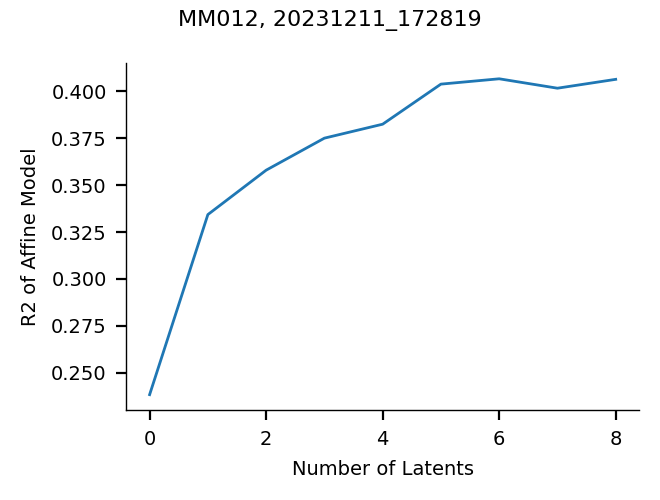

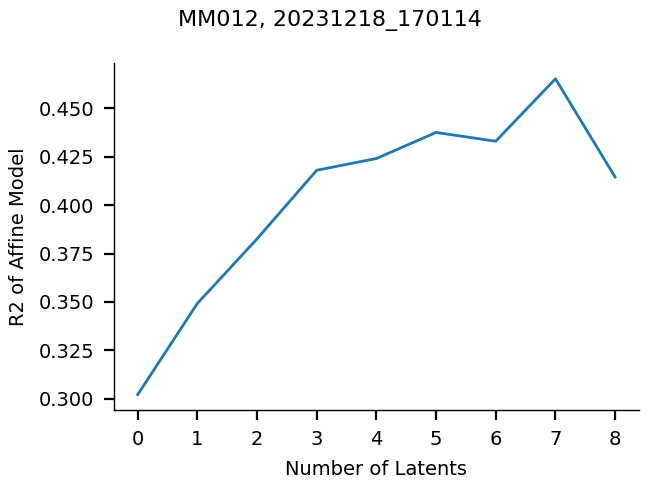

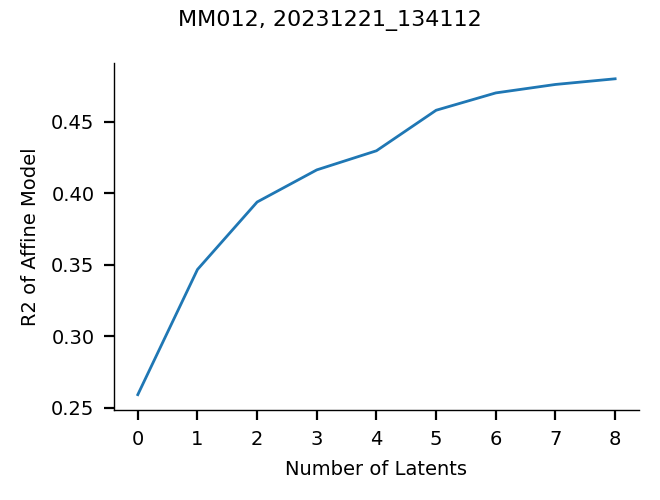

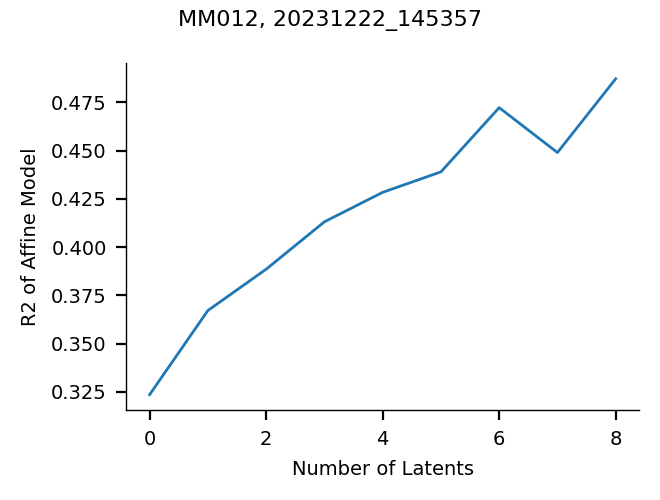

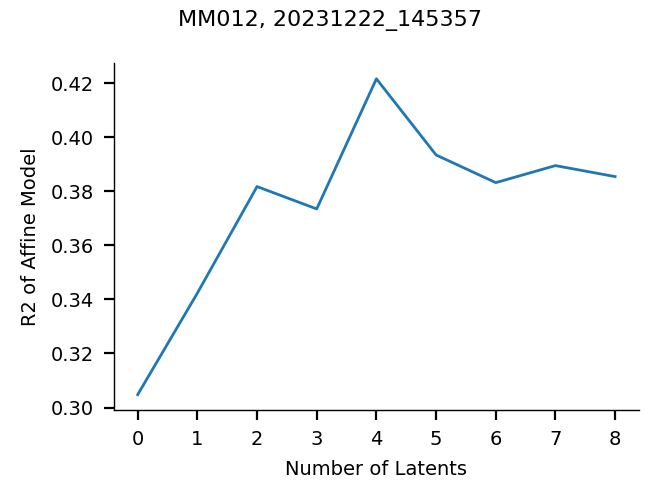

In [5]:
eval_models.plot_r2_latents(das_00, subj_idx=0, sess_idx=0, is_msess=False)
eval_models.plot_r2_latents(das_01, subj_idx=0, sess_idx=1, is_msess=False)
eval_models.plot_r2_latents(das_02, subj_idx=0, sess_idx=2, is_msess=False)
eval_models.plot_r2_latents(das_03, subj_idx=0, sess_idx=3, is_msess=False)
eval_models.plot_r2_latents(das_04, subj_idx=0, sess_idx=3, is_msess=False)

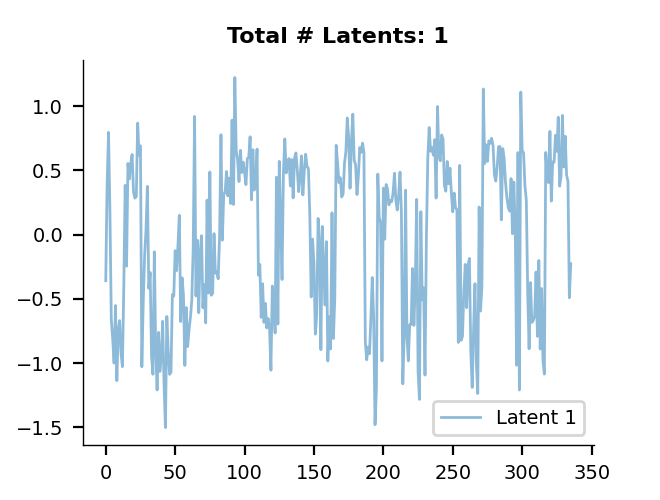

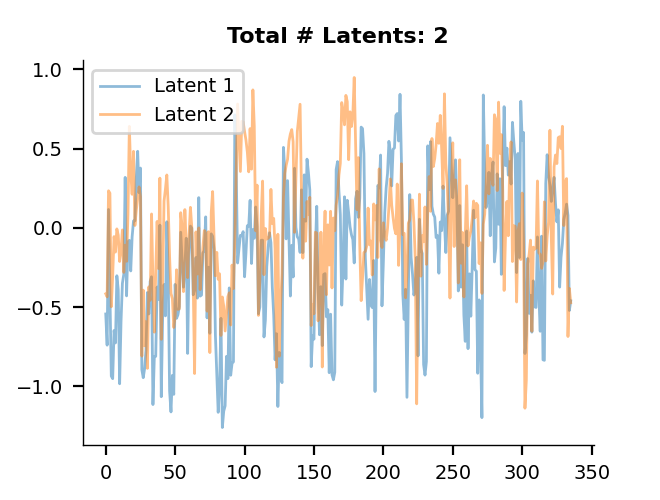

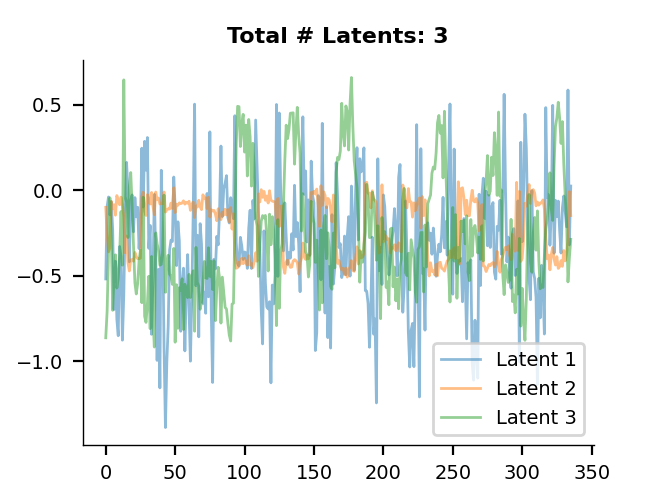

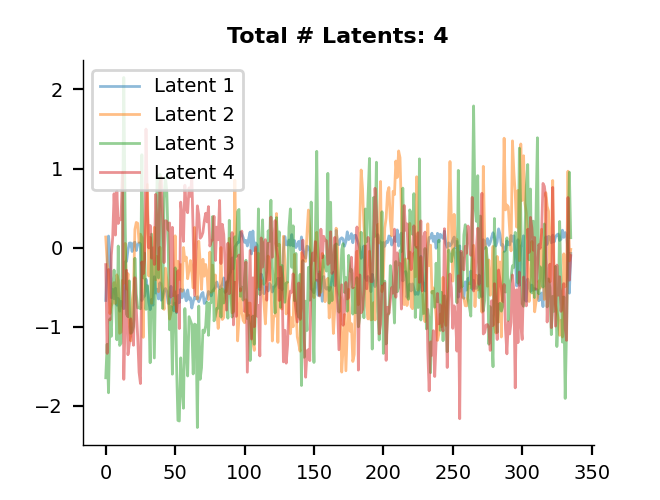

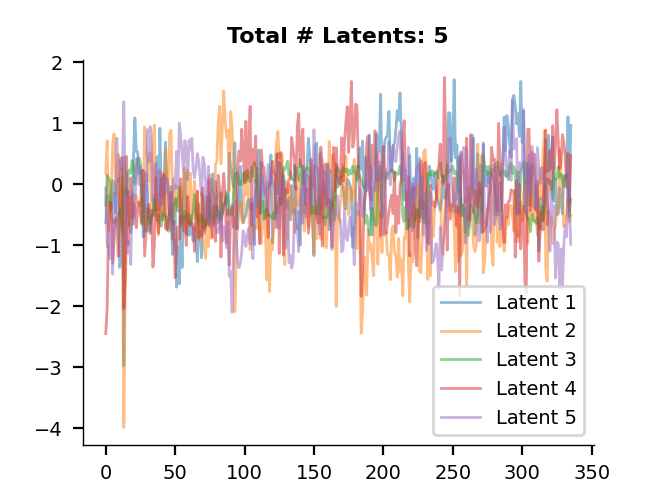

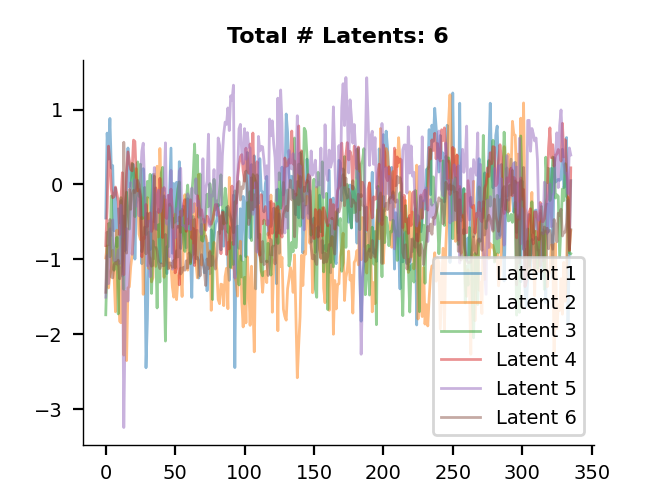

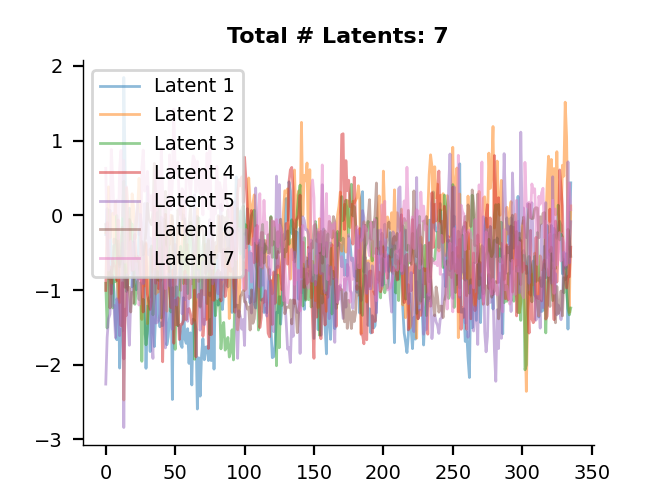

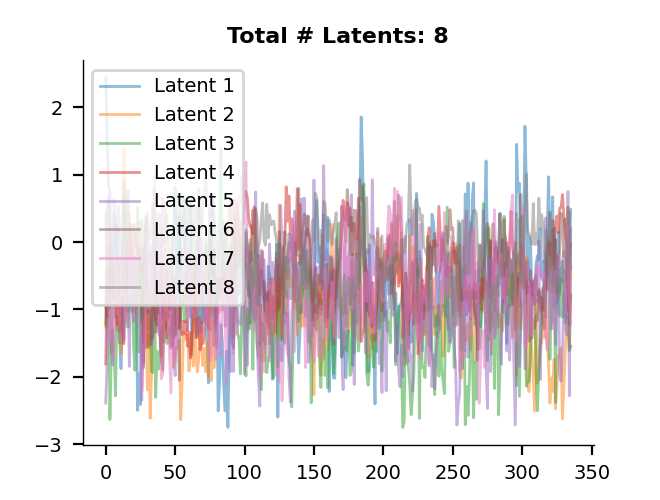

In [32]:
eval_models.plot_latents_all(das_00)

## Regions

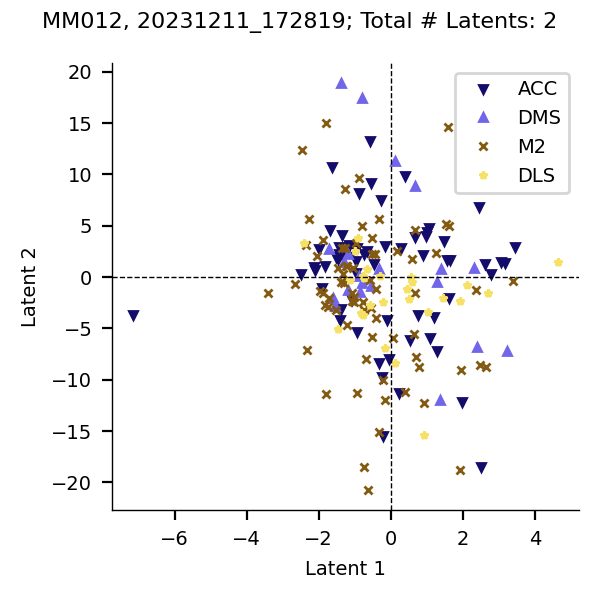

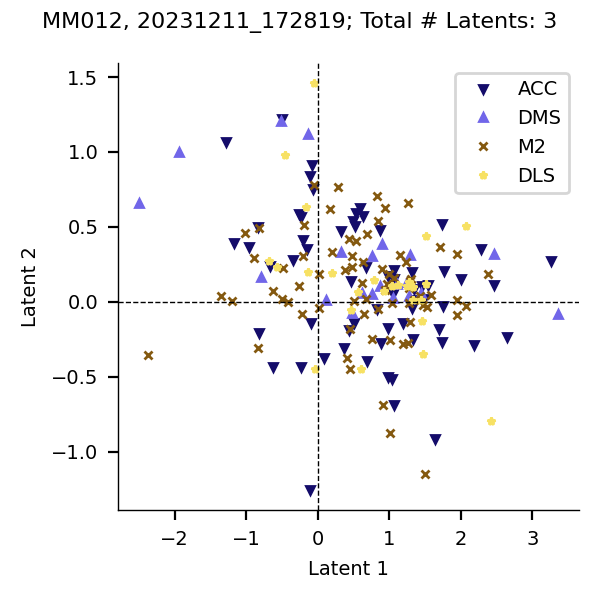

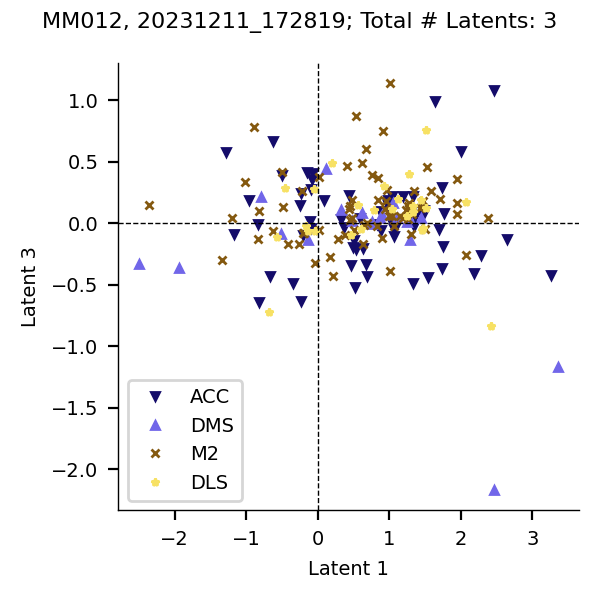

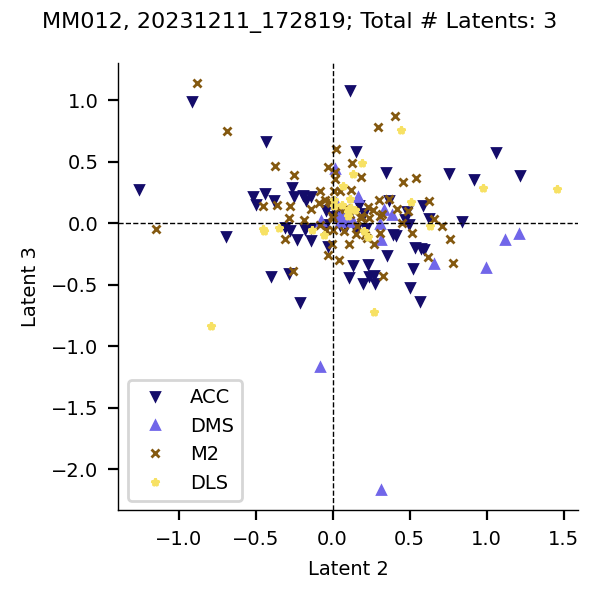

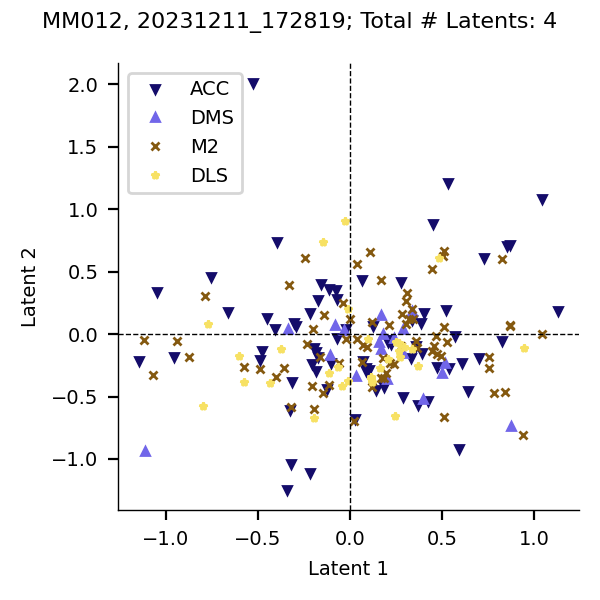

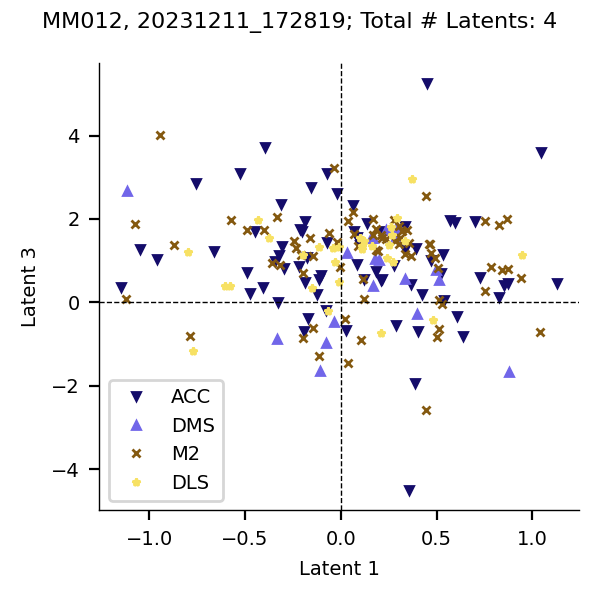

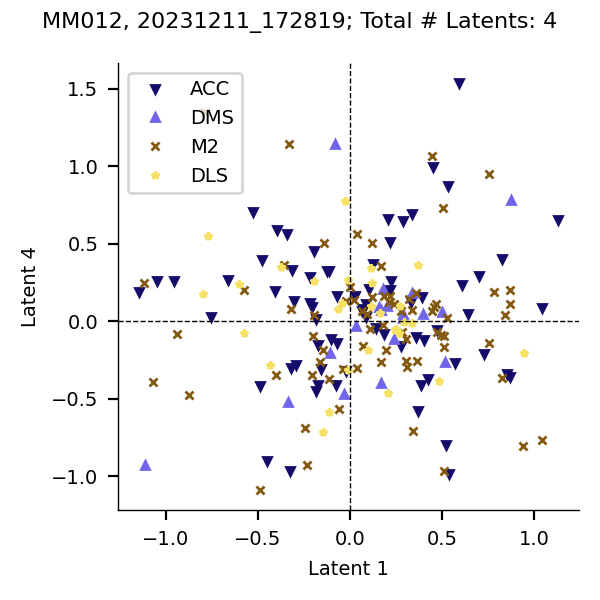

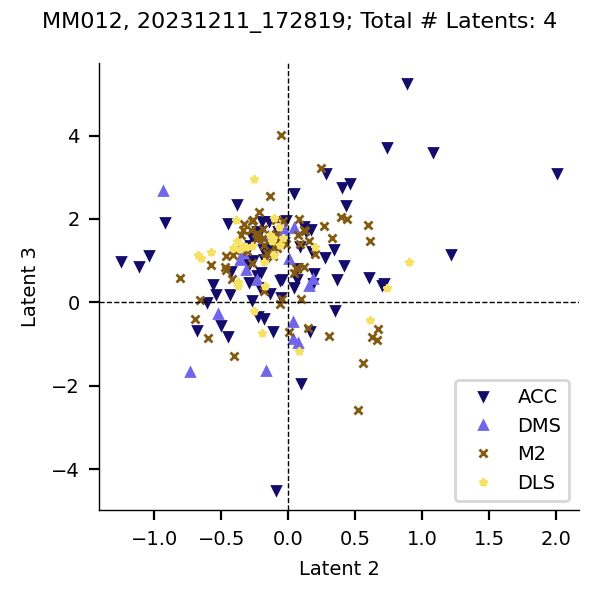

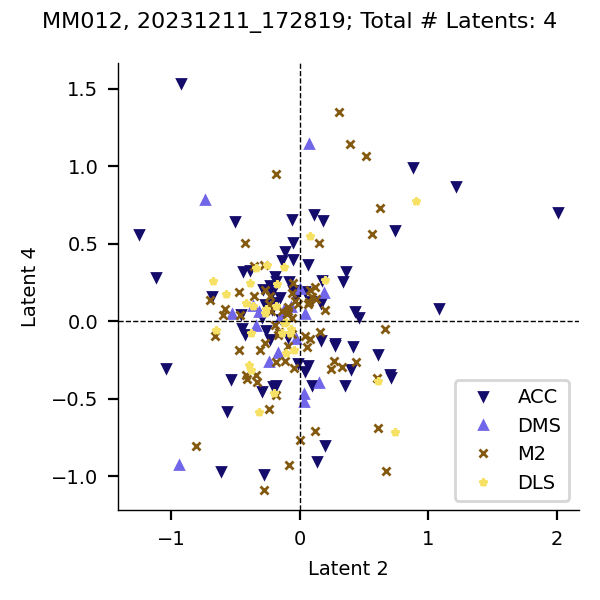

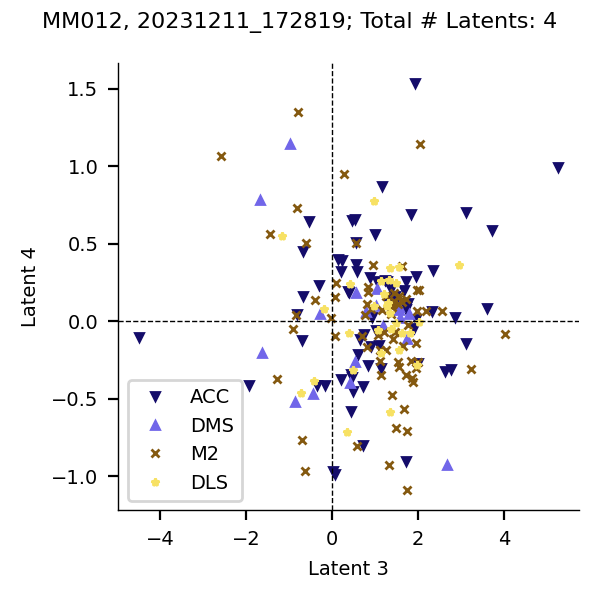

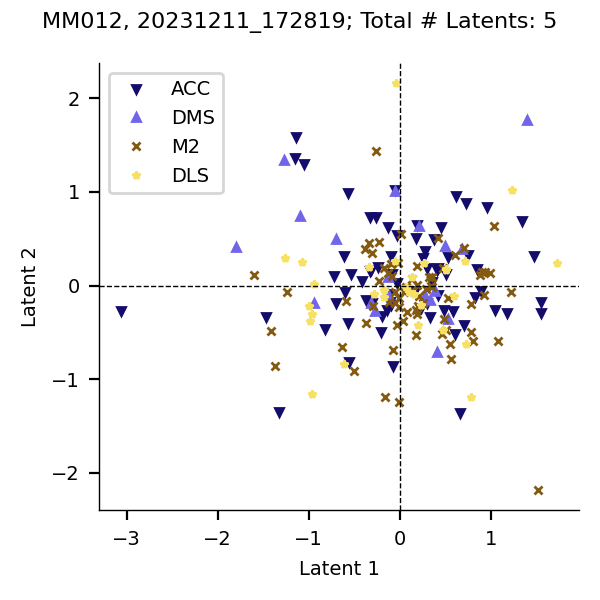

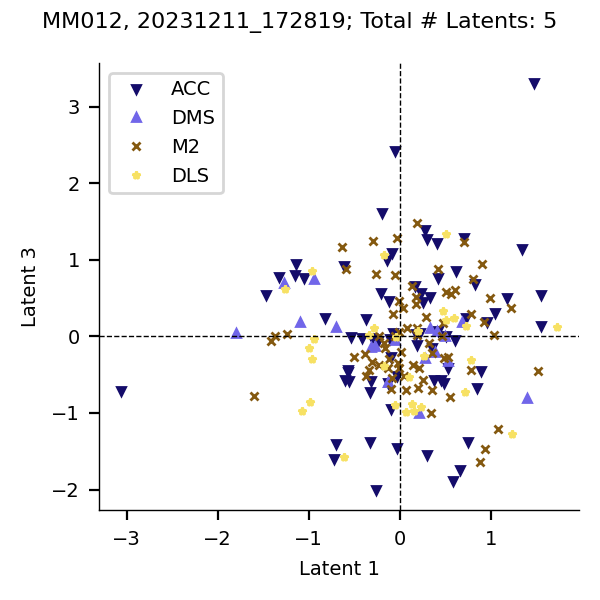

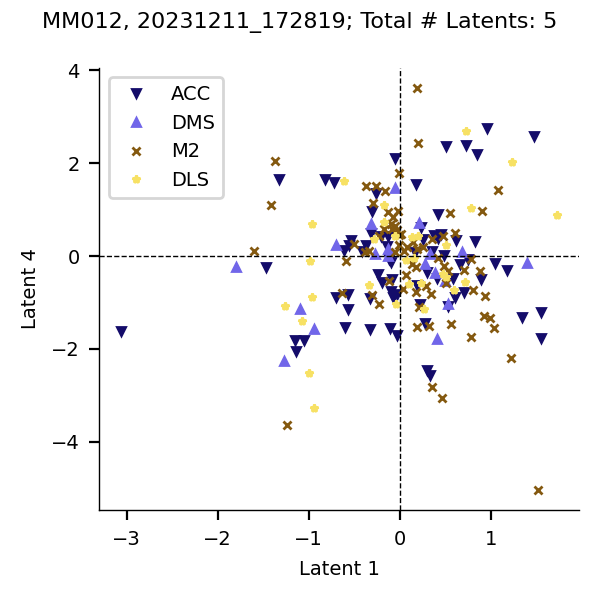

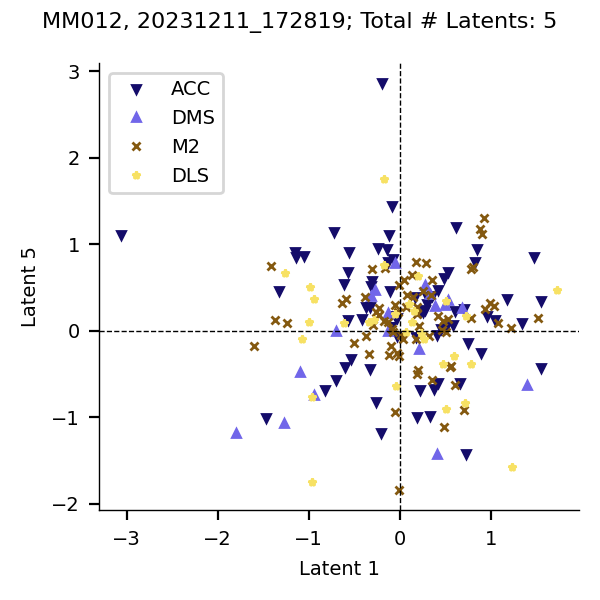

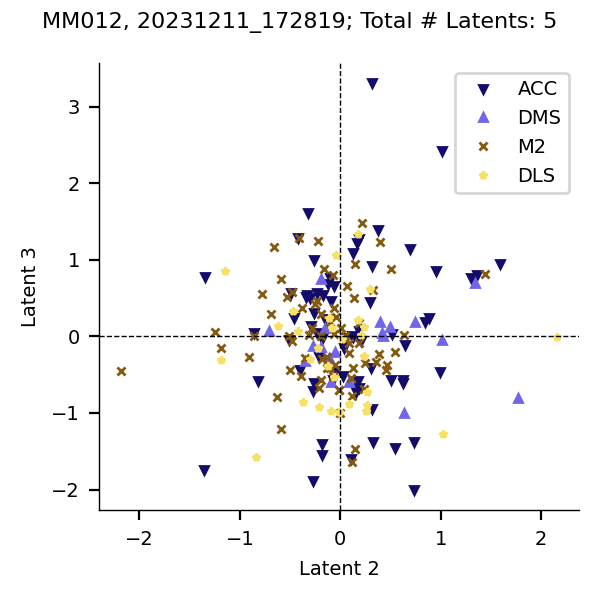

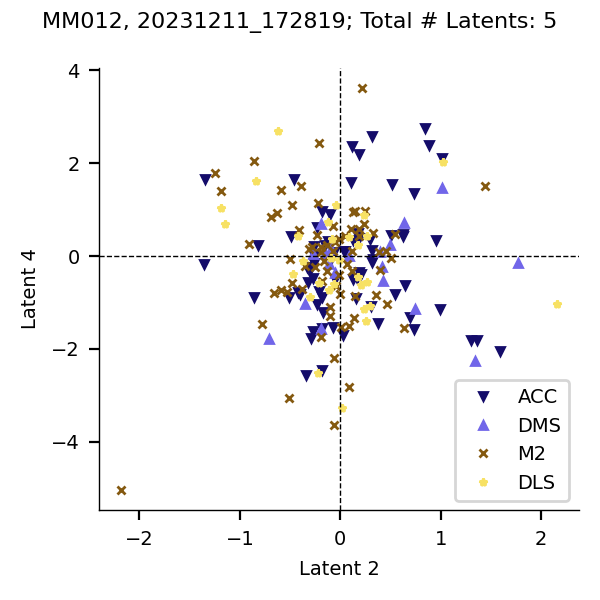

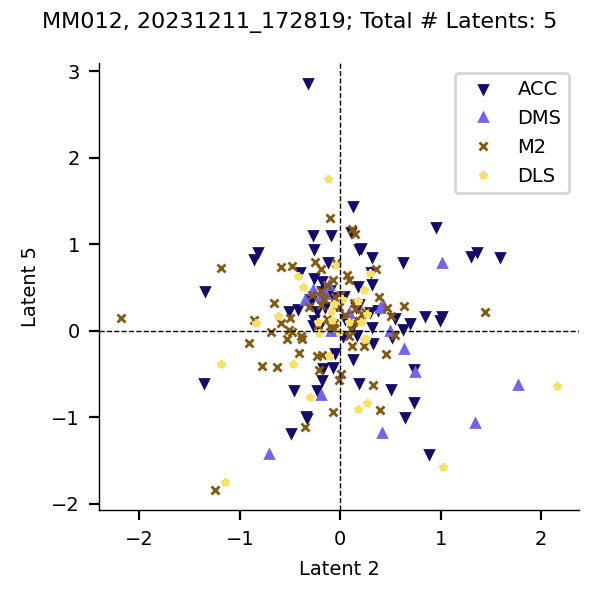

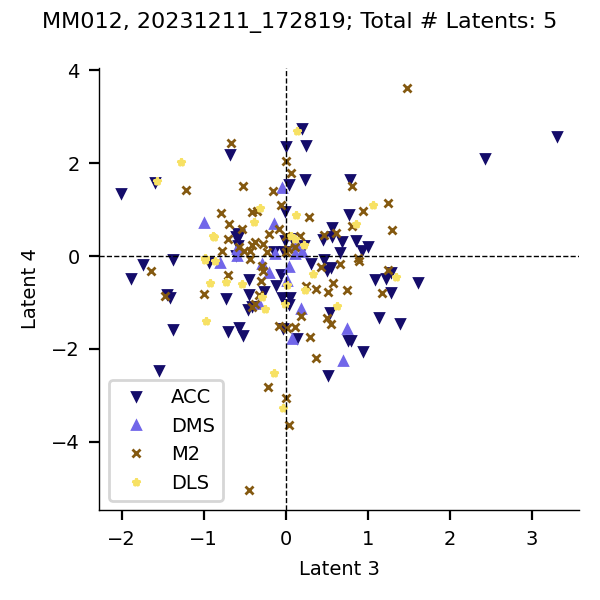

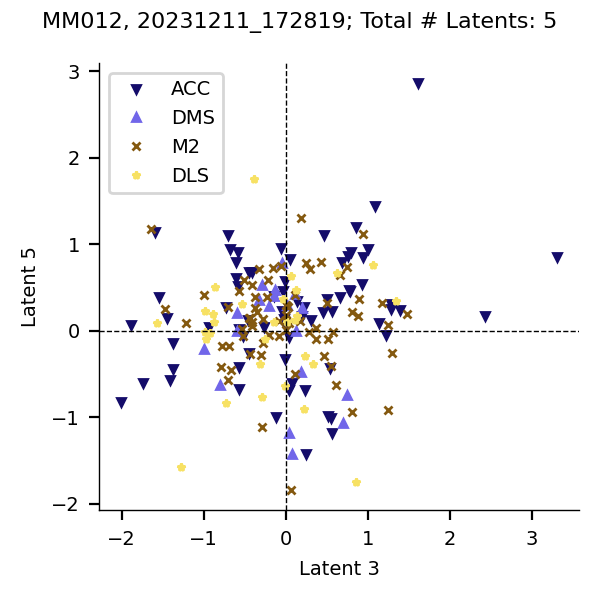

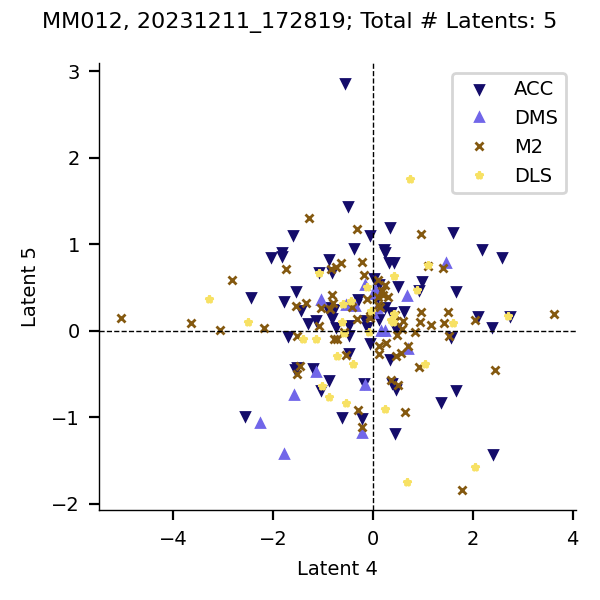

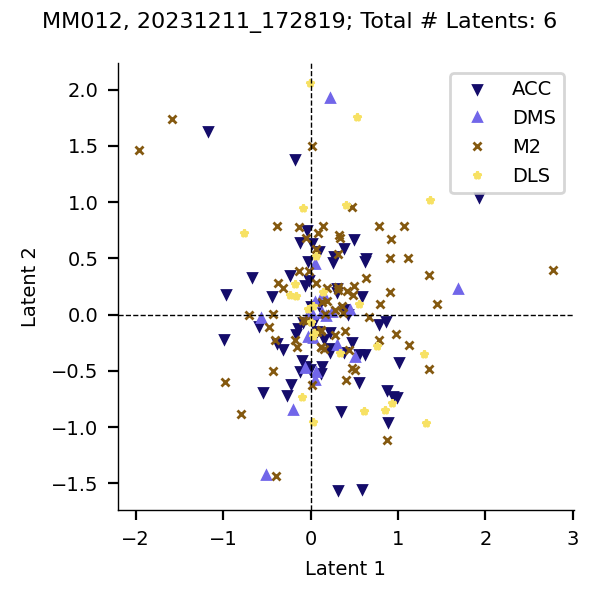

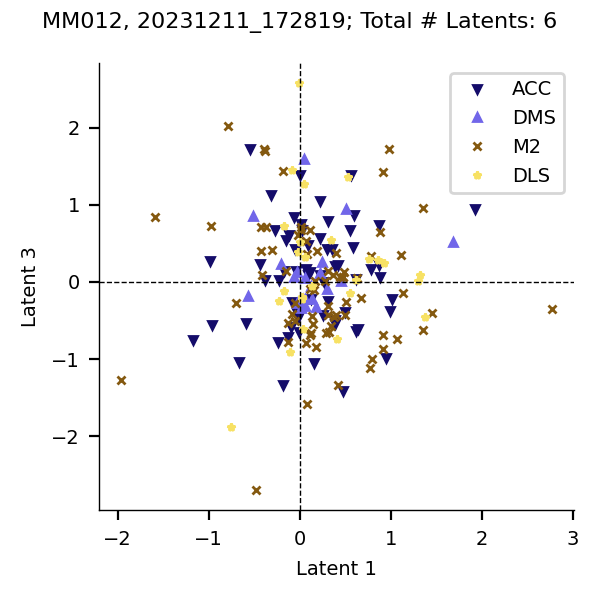

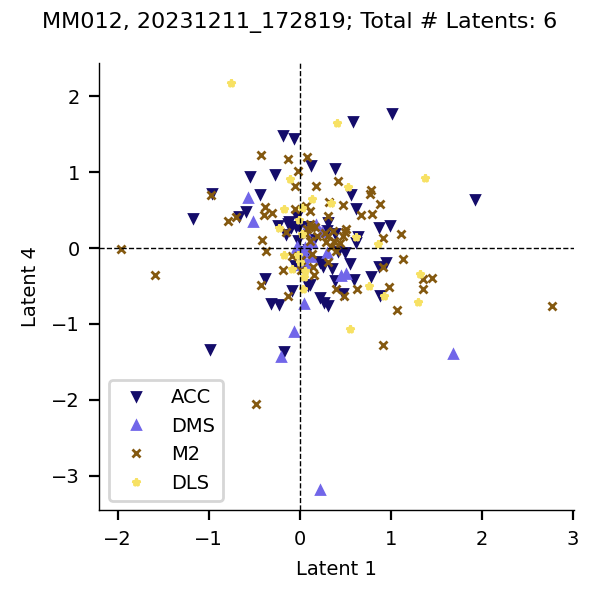

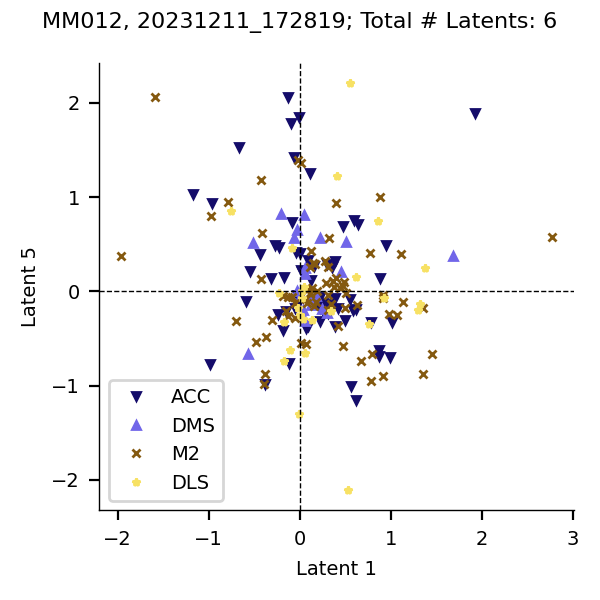

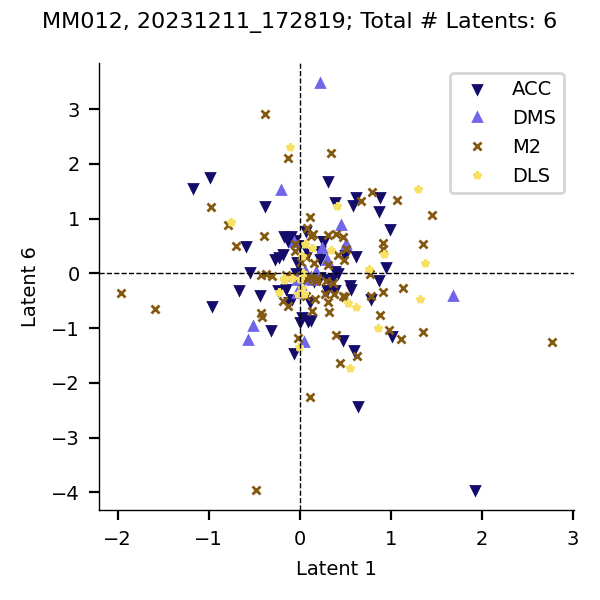

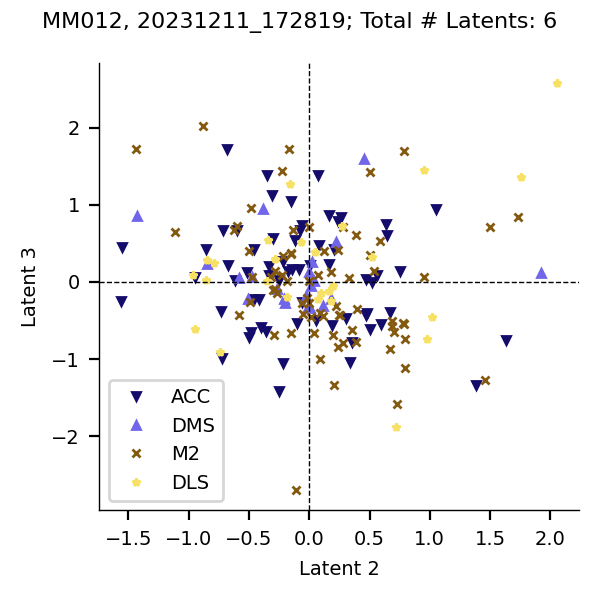

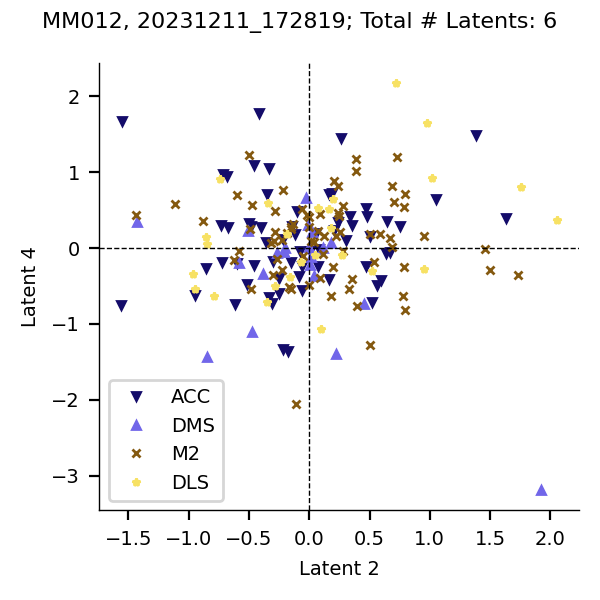

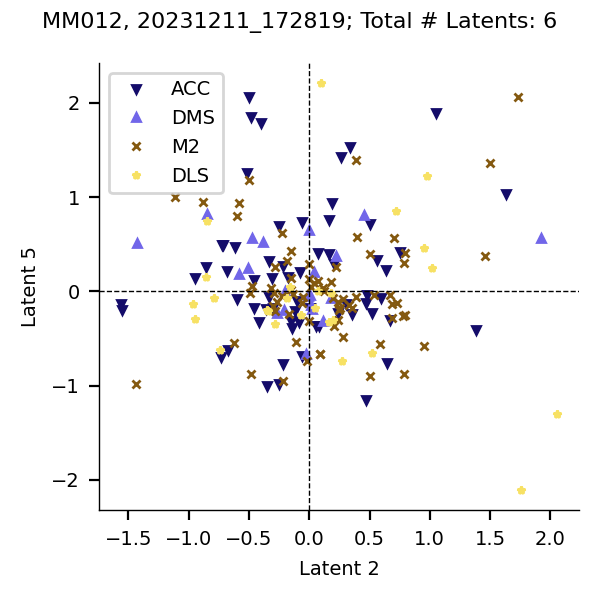

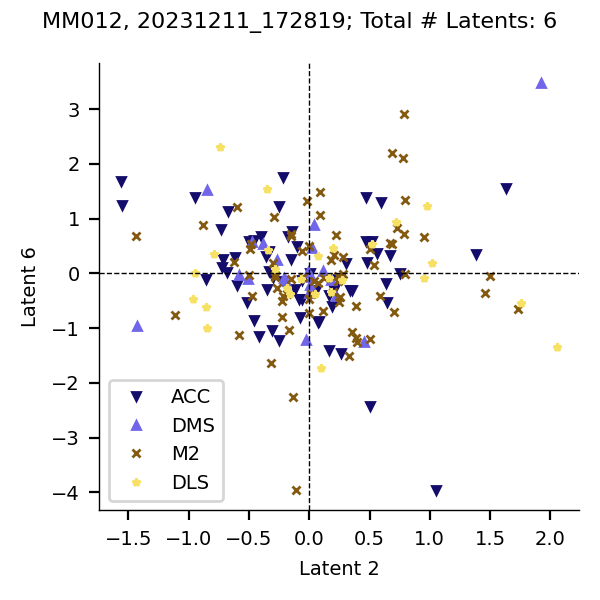

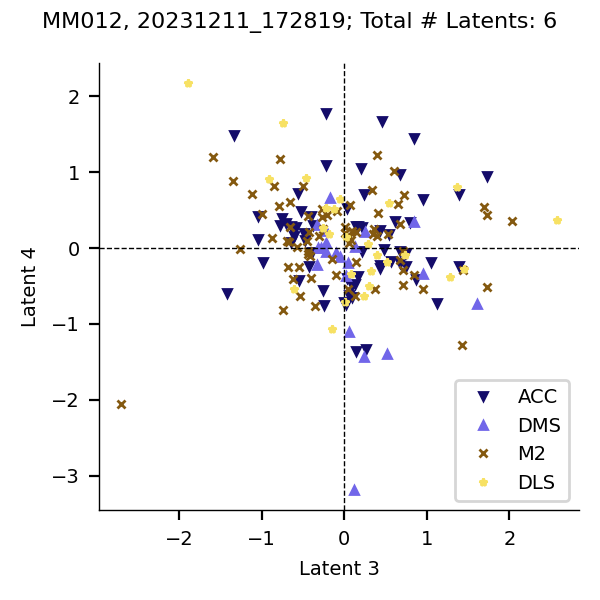

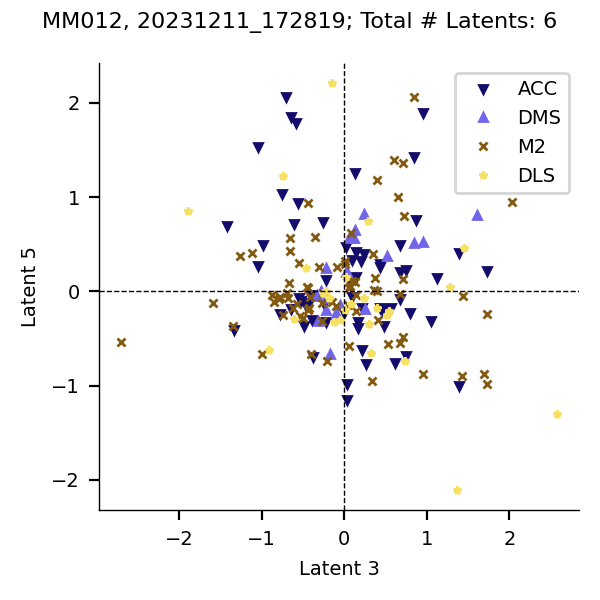

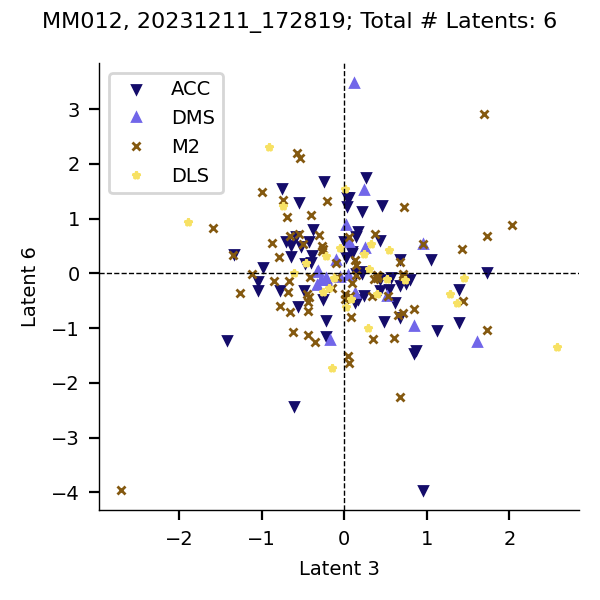

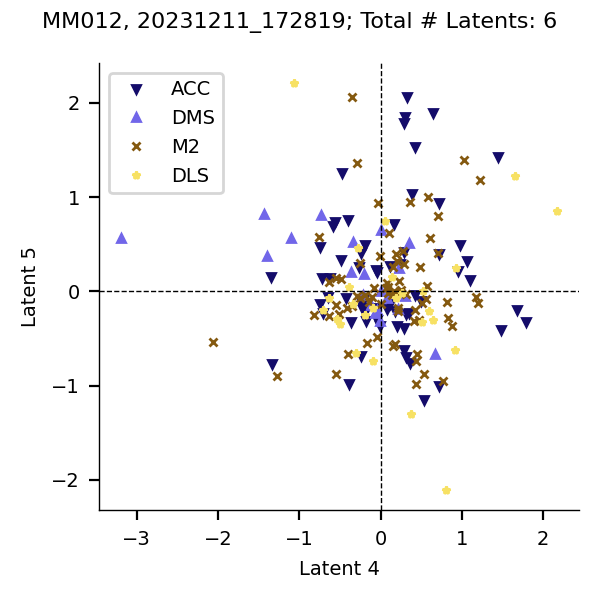

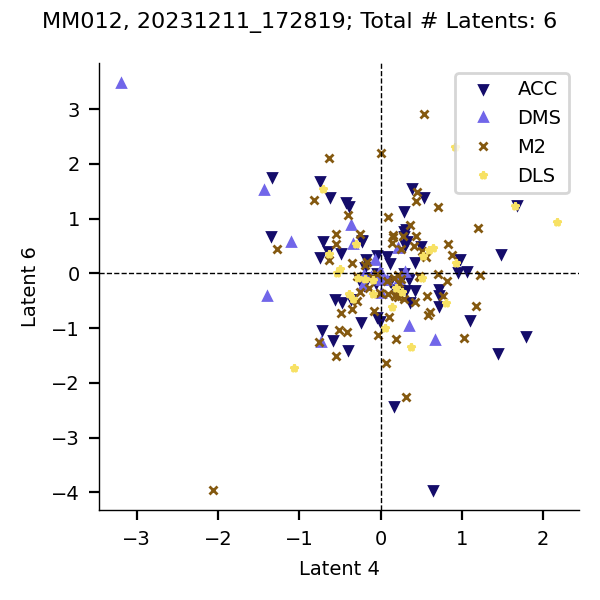

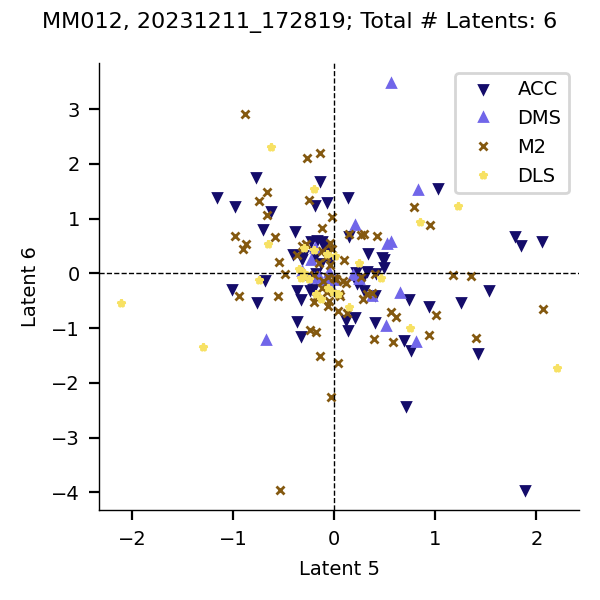

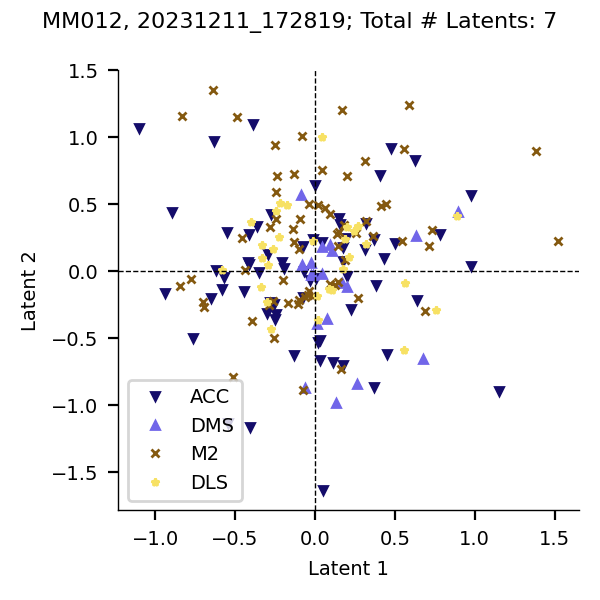

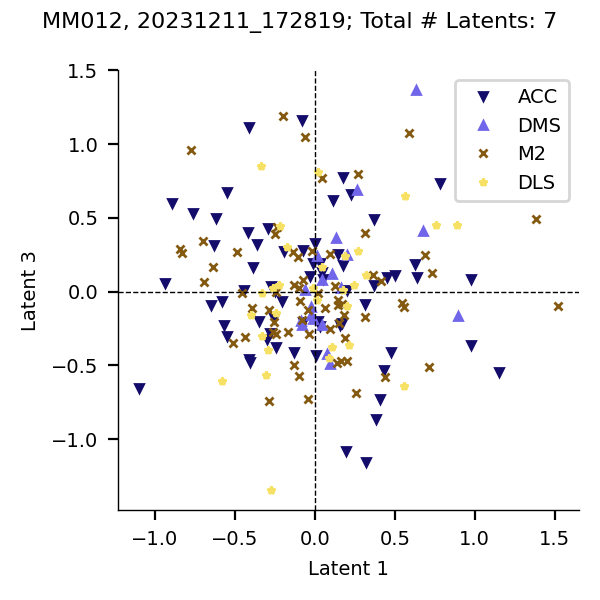

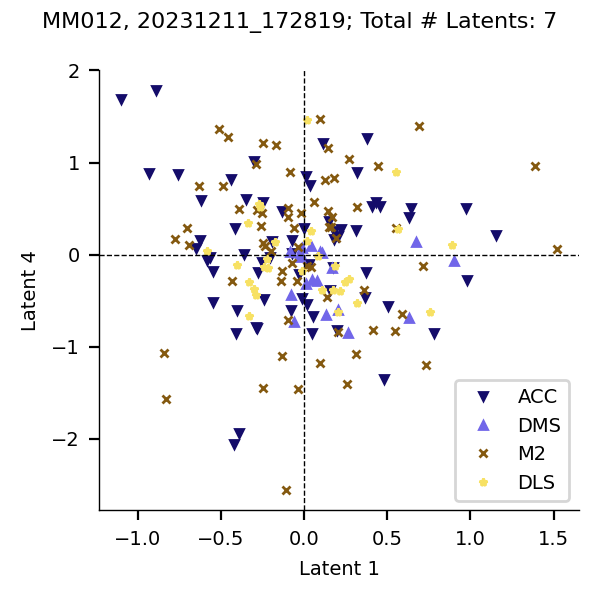

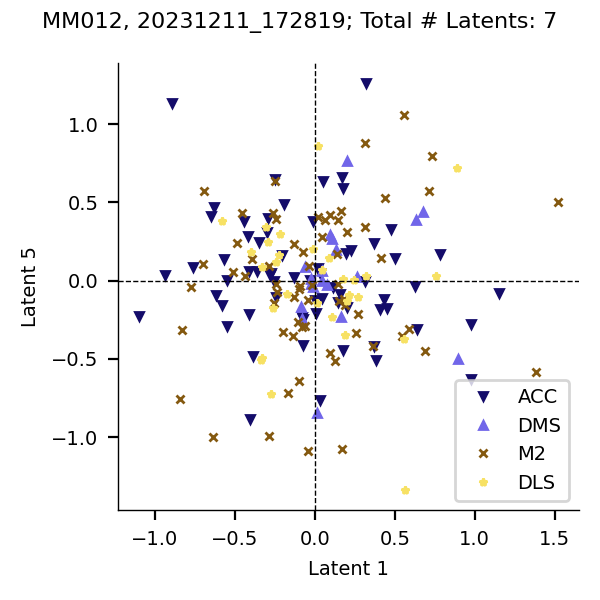

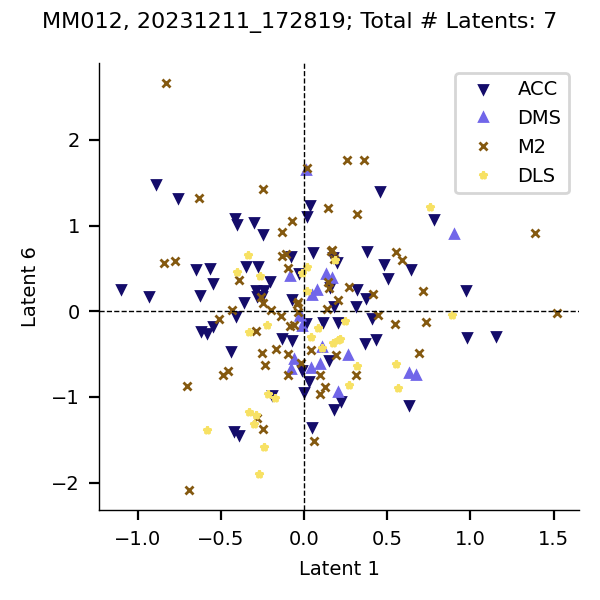

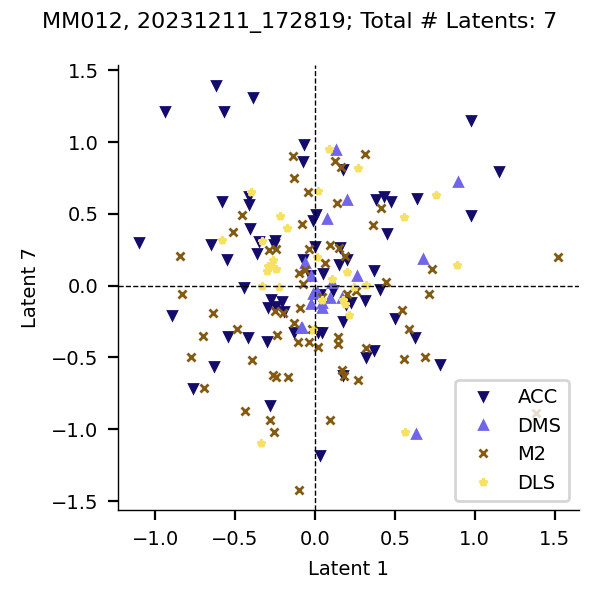

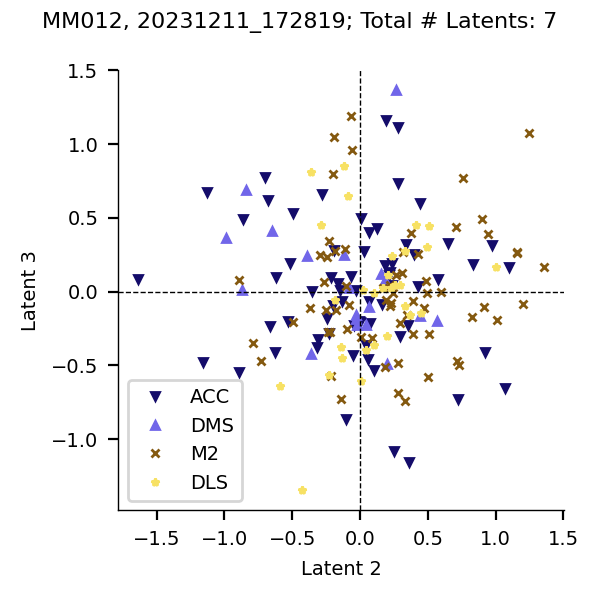

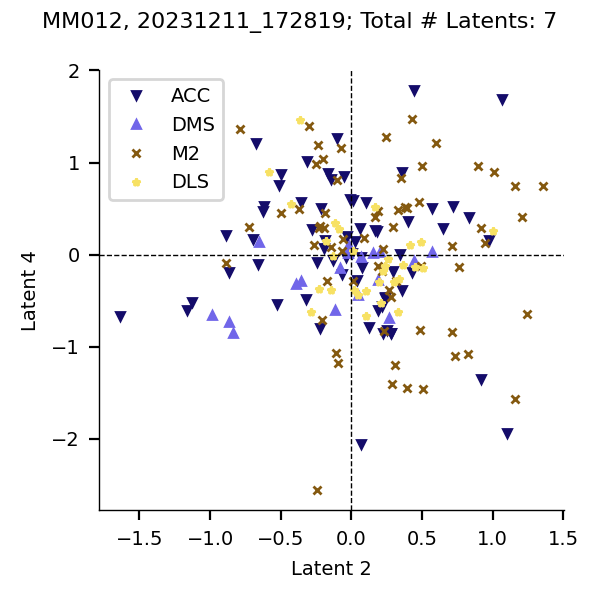

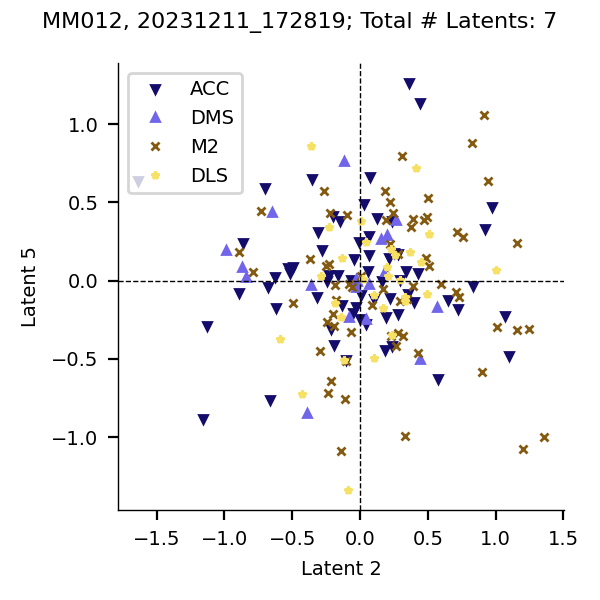

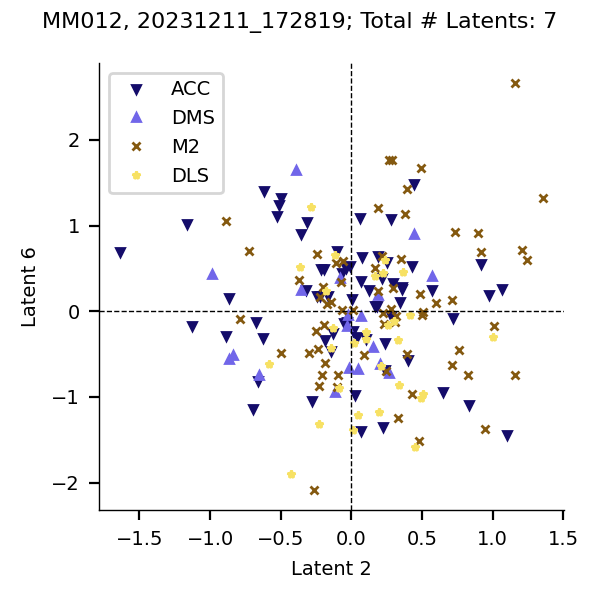

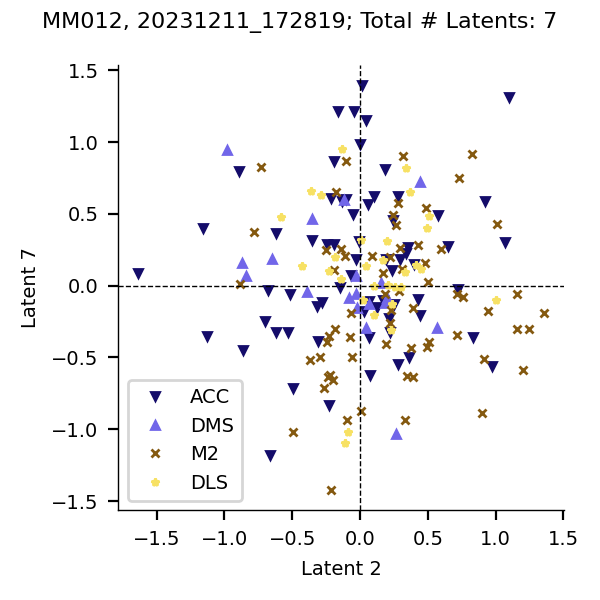

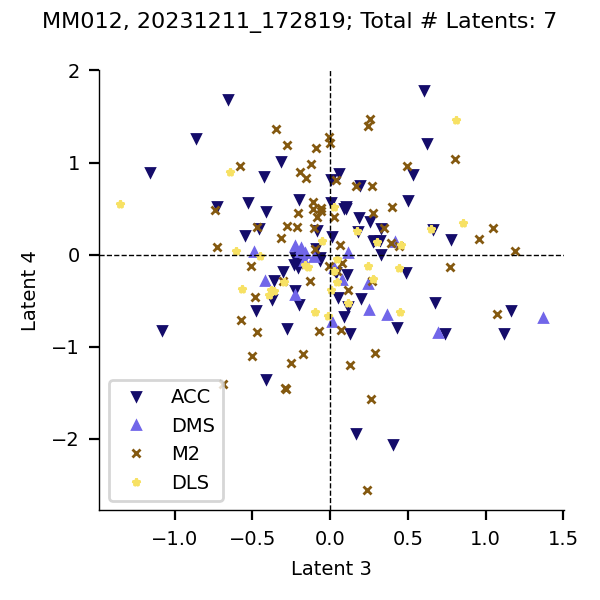

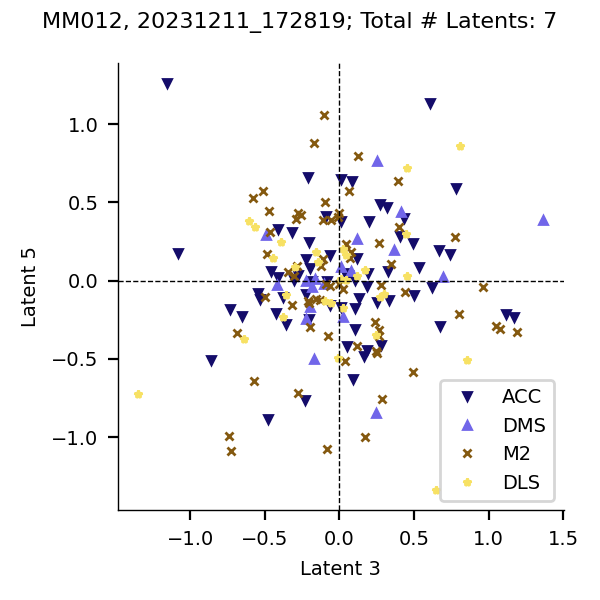

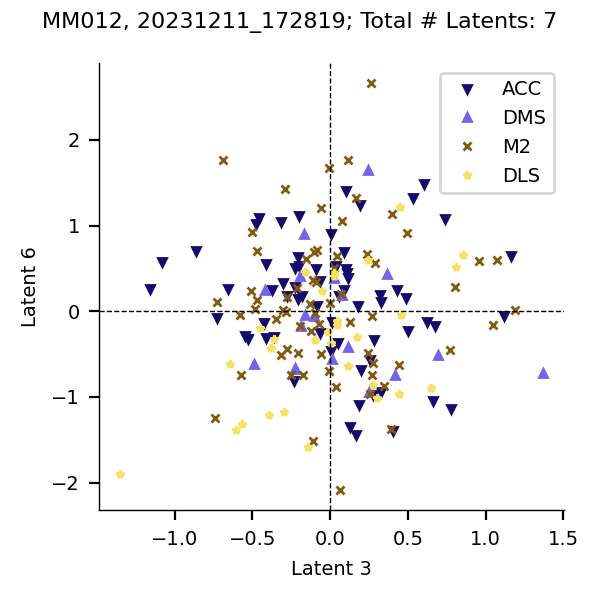

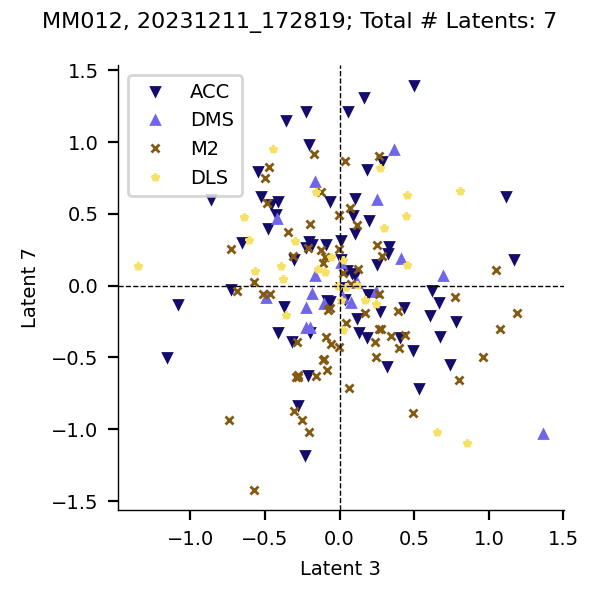

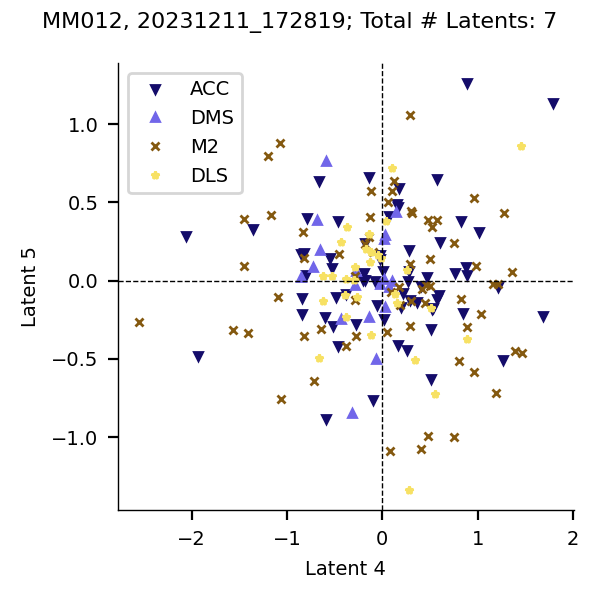

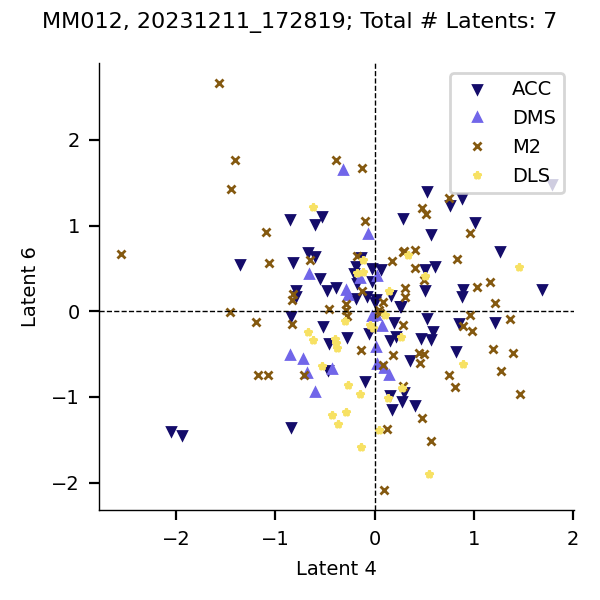

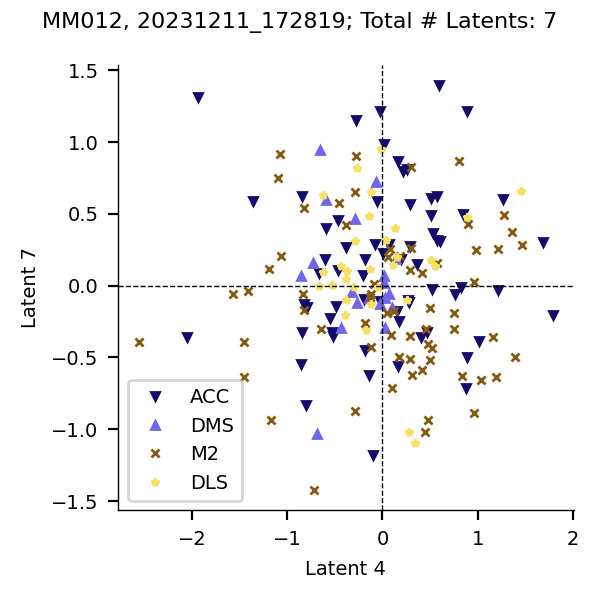

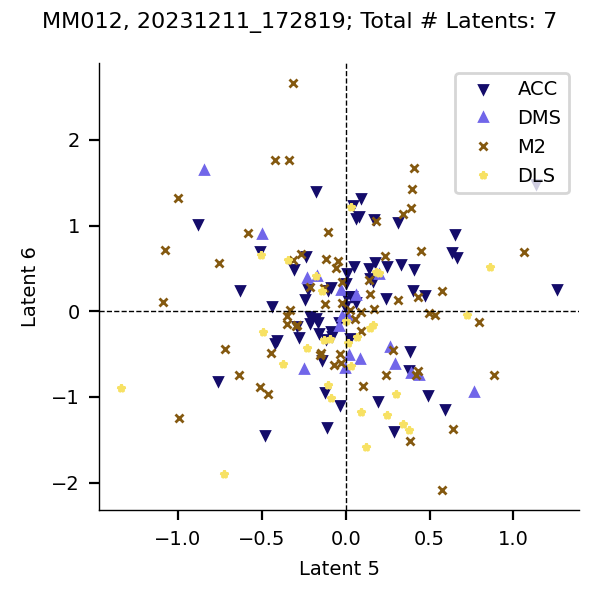

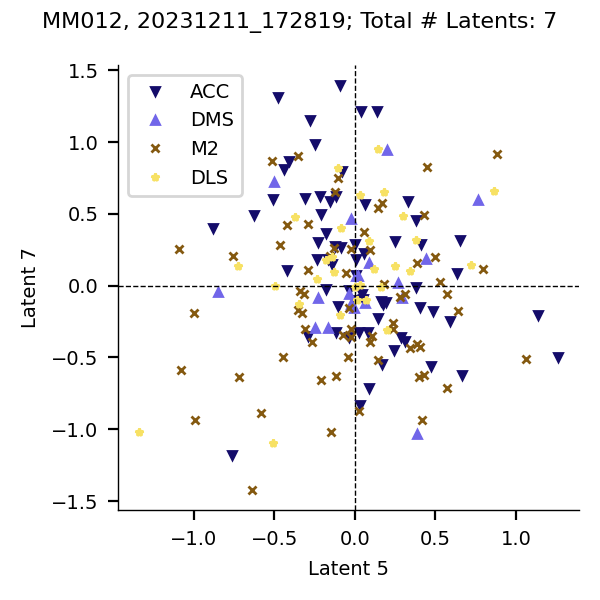

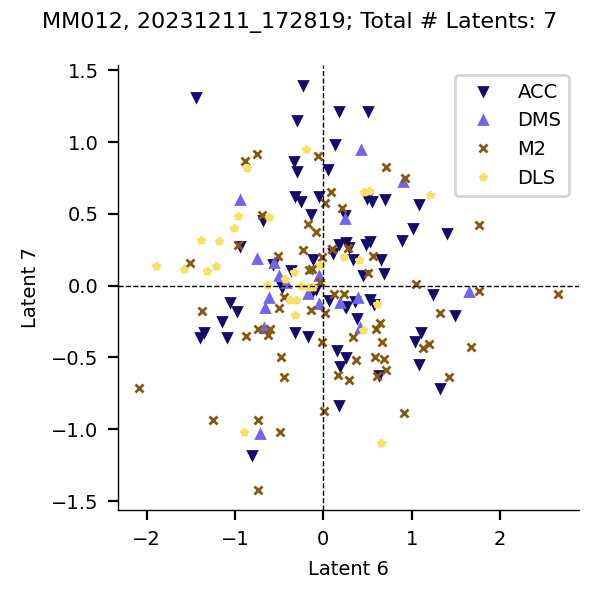

In [47]:
eval_models.plot_cweights_regs_sess(das_00, 0, 0, do_save=True, do_show=False)

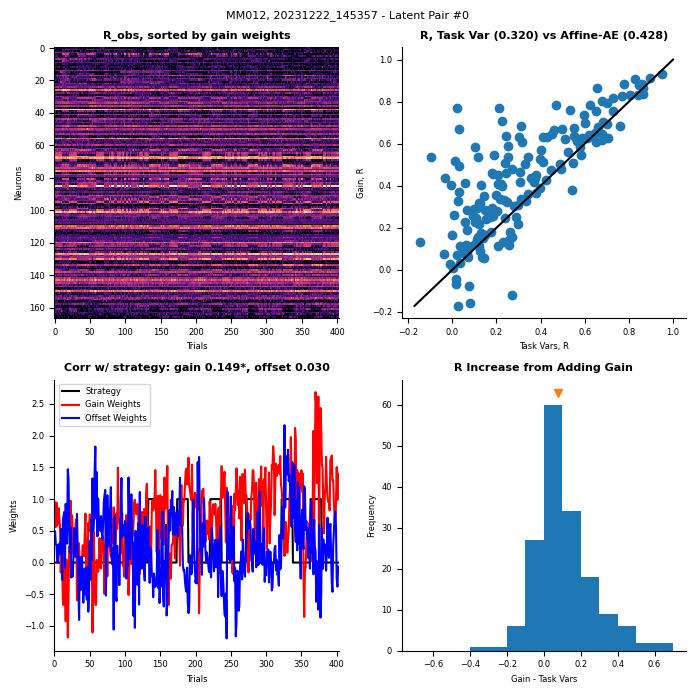

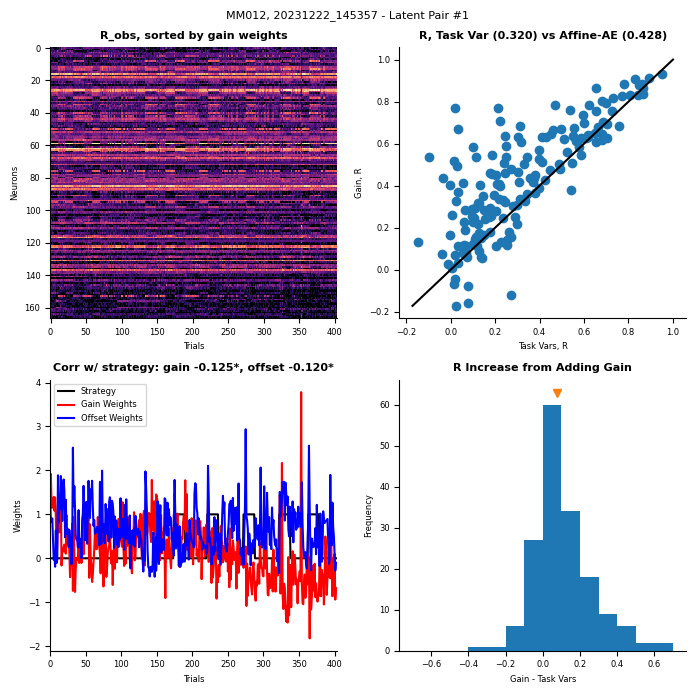

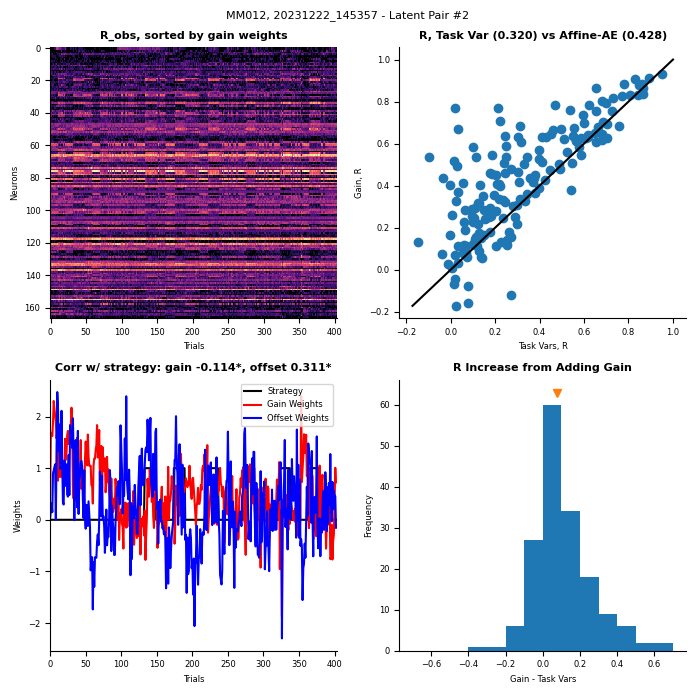

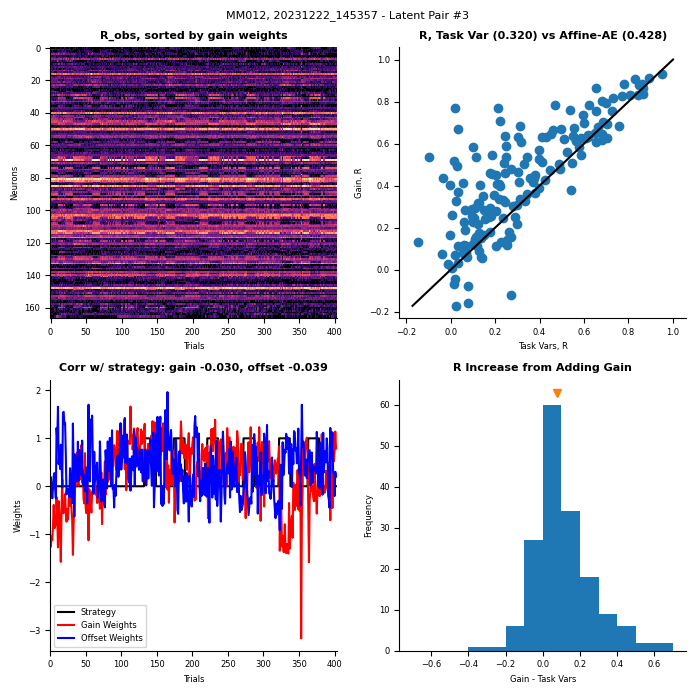

In [14]:
fitlvm_utils.plot_summary(das_03[3], subj_idx=0, sess_idx=3)

In [ ]:
# das_00 with 2 latents has nice separation

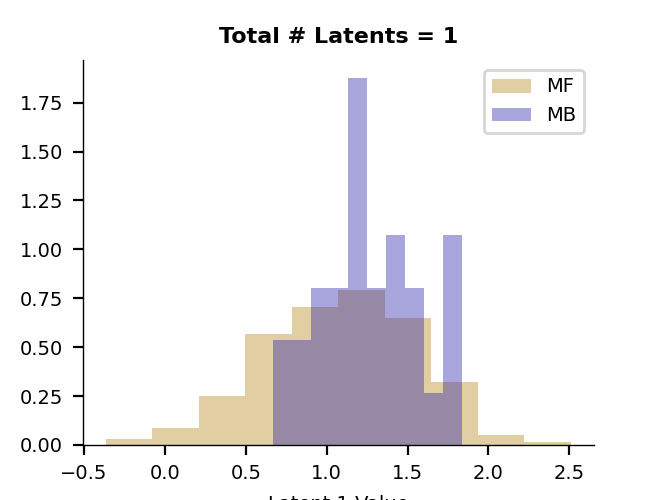

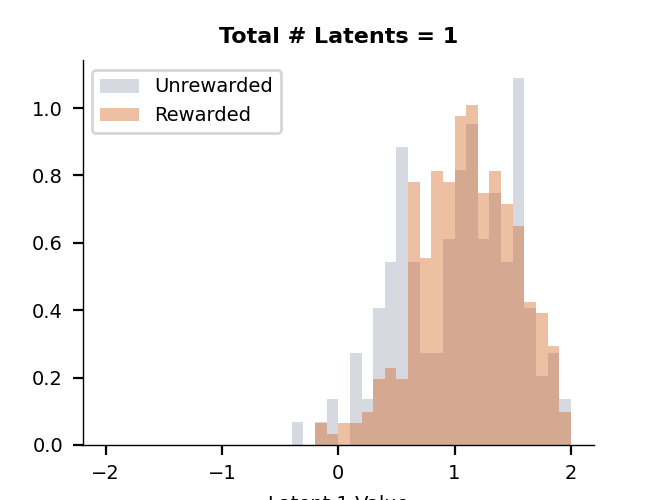

In [42]:
latent = 1; latent_idx=0
das = das_02[latent-1]
model = das['affineae']['model']
robs = das['data']['robs'][:,das['affineae']['model'].cids]
strat = das['data']['strategy']
rewarded = das['data']['rewarded']

zgain = model.gain_mu.get_weights()[:,latent_idx]

plt.figure()
plt.hist(zgain[strat==0], alpha=0.4, density=True, color="#B58517", label="MF")
plt.hist(zgain[strat==1], alpha=0.4, density=True, color="#2A20AA", label="MB")
plt.xlabel(f"Latent {latent_idx+1} Value"); plt.legend()
plt.title(f"Total # Latents = {latent}")
plt.show()

plt.figure()
plt.hist(zgain[rewarded==0], alpha=0.4, bins=np.linspace(-2, 2, 41), density=True, color="#9CA1B2", label="Unrewarded")
plt.hist(zgain[rewarded==1], alpha=0.4, bins=np.linspace(-2, 2, 41), density=True, color="#D2611B", label="Rewarded")
plt.xlabel(f"Latent {latent_idx+1} Value"); plt.legend()
plt.title(f"Total # Latents = {latent}")
plt.show()

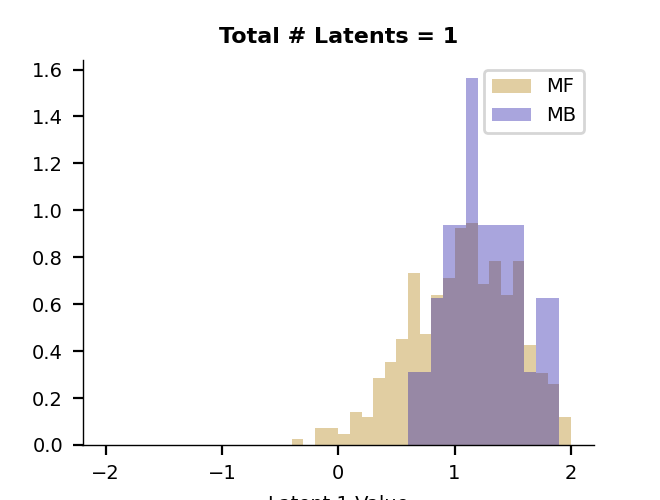

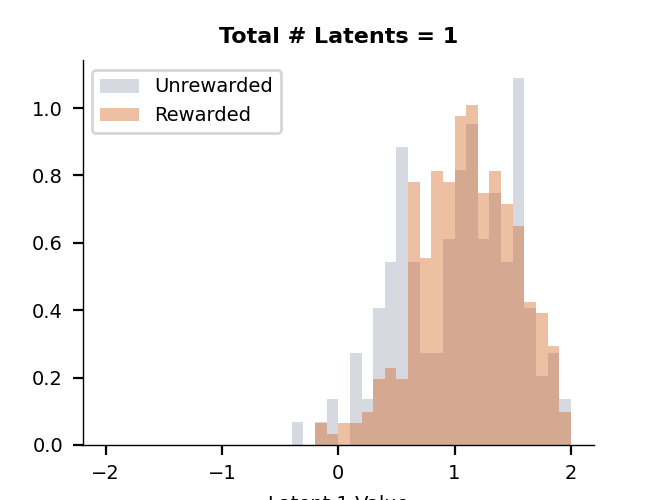

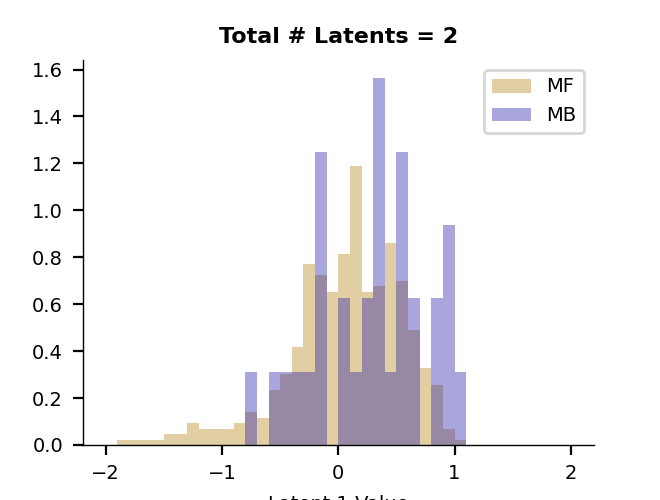

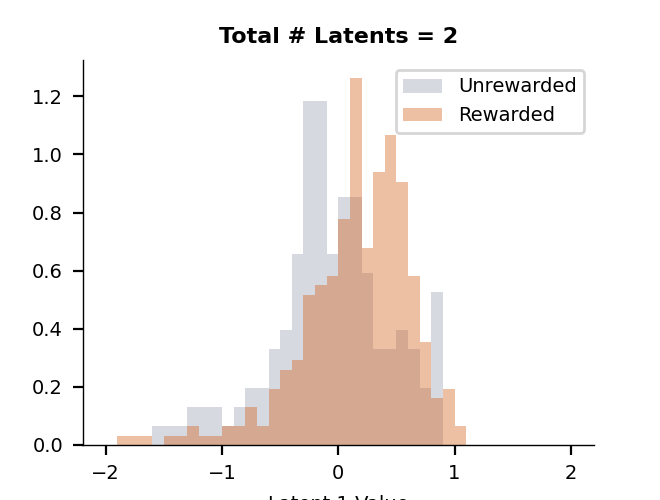

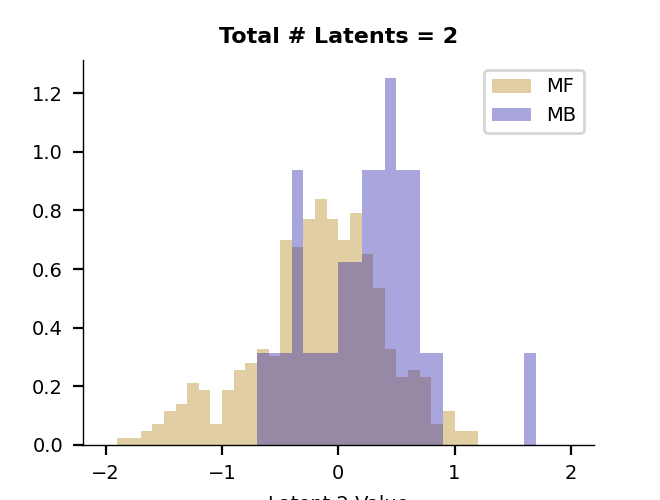

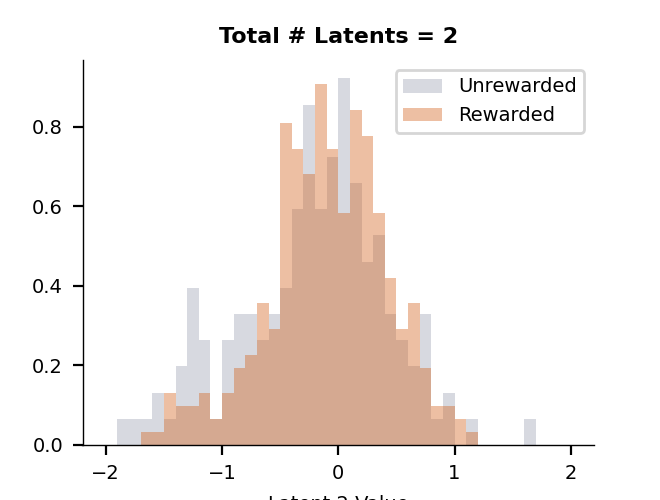

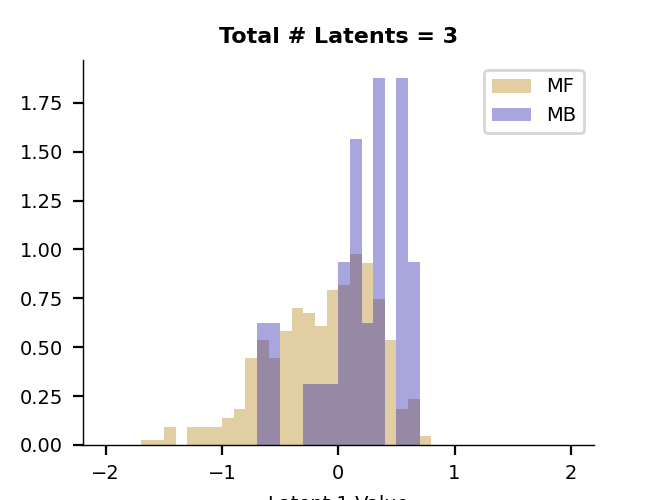

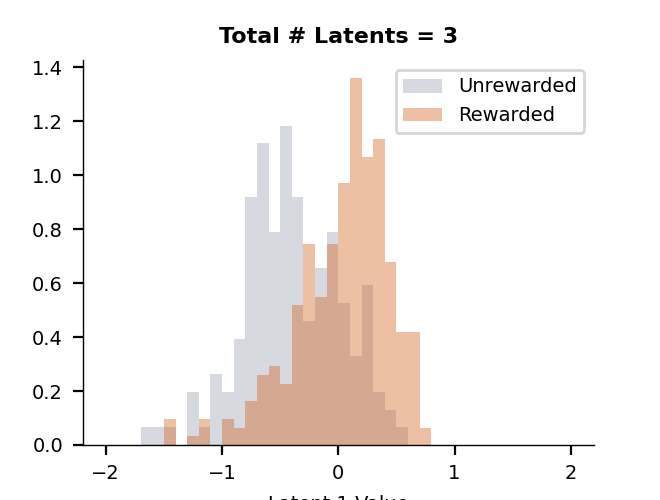

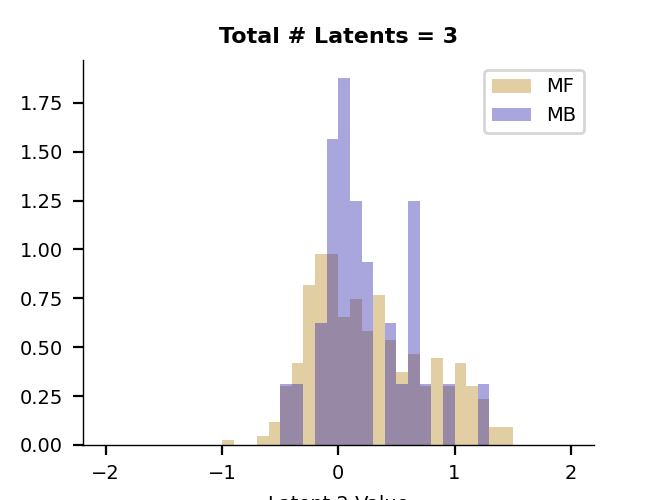

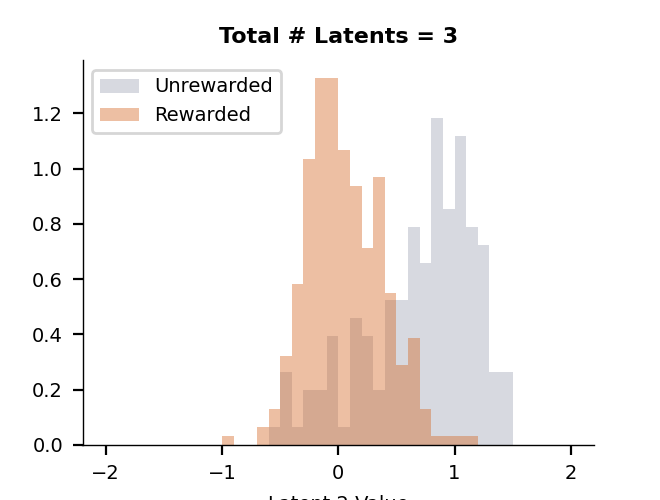

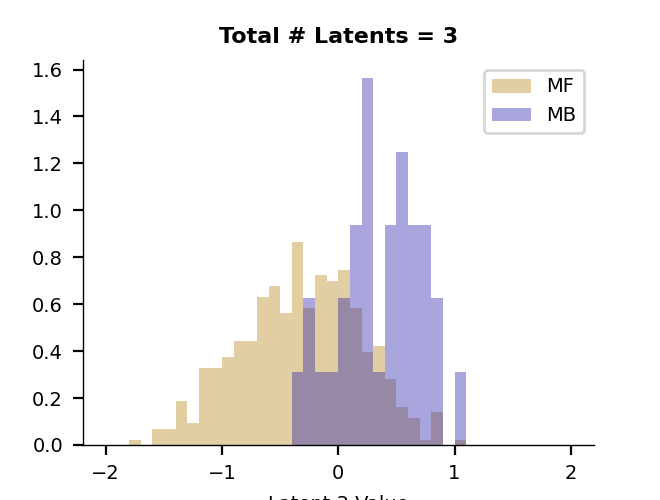

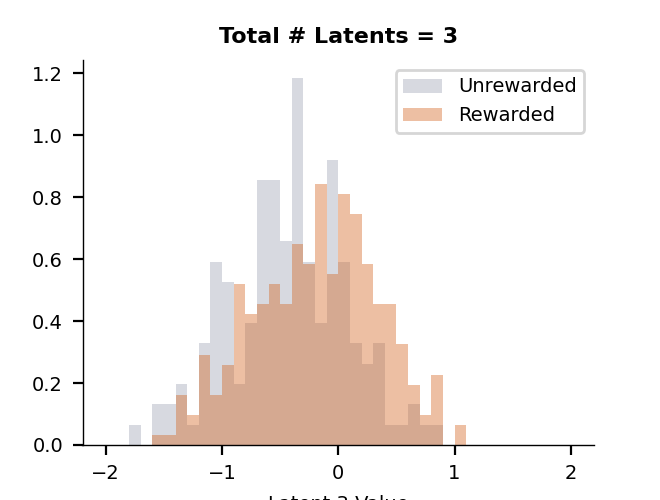

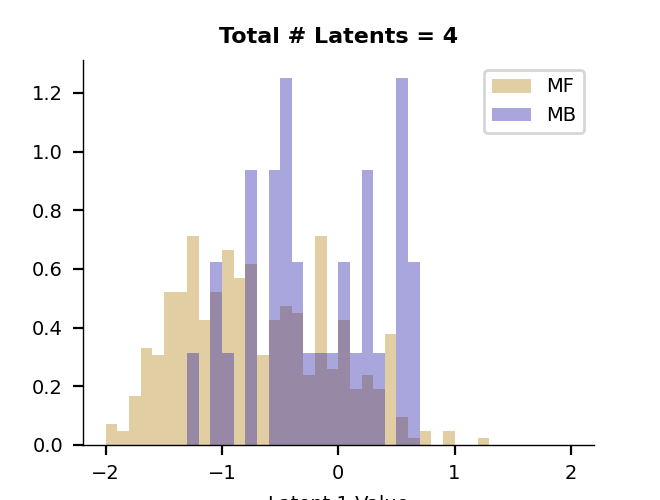

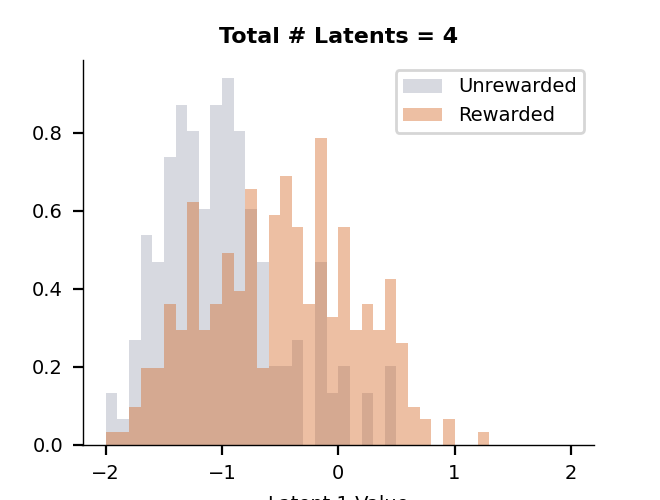

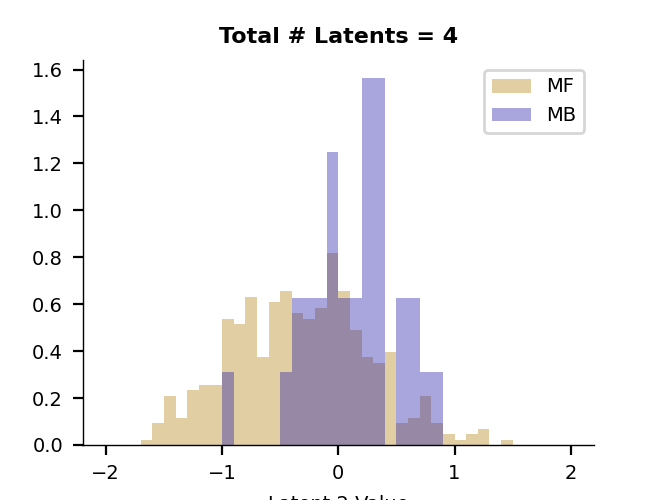

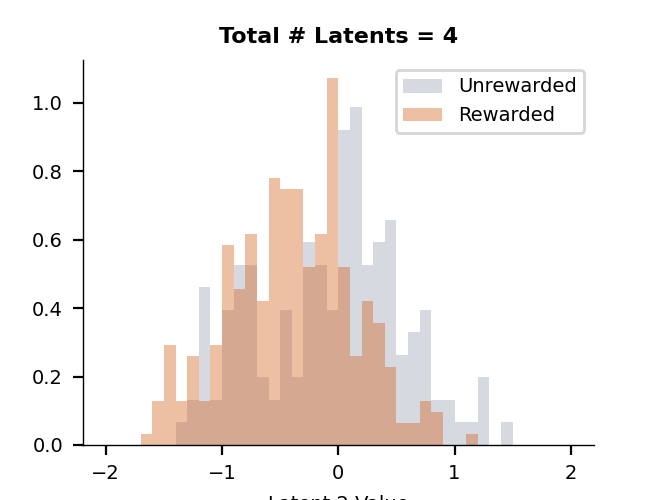

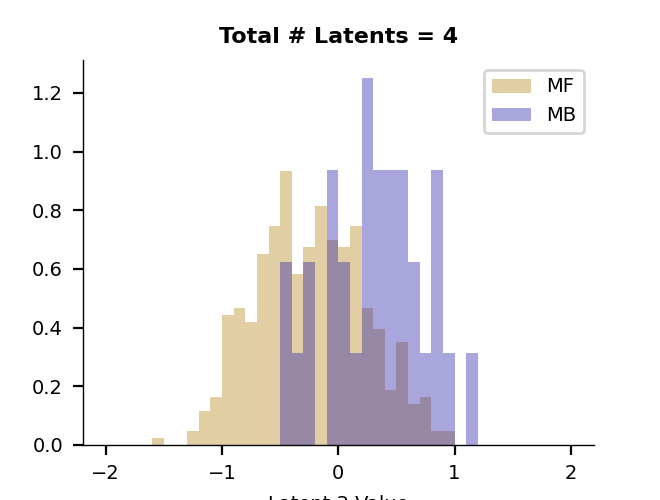

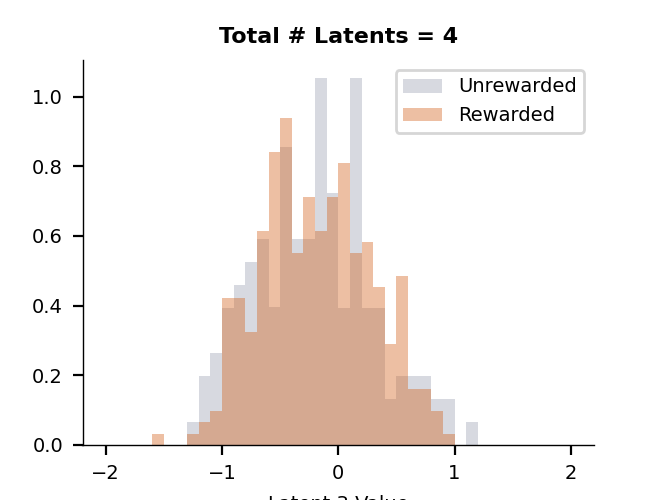

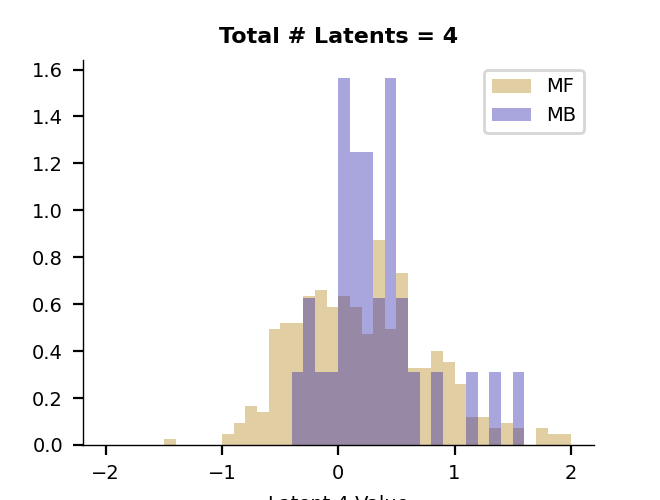

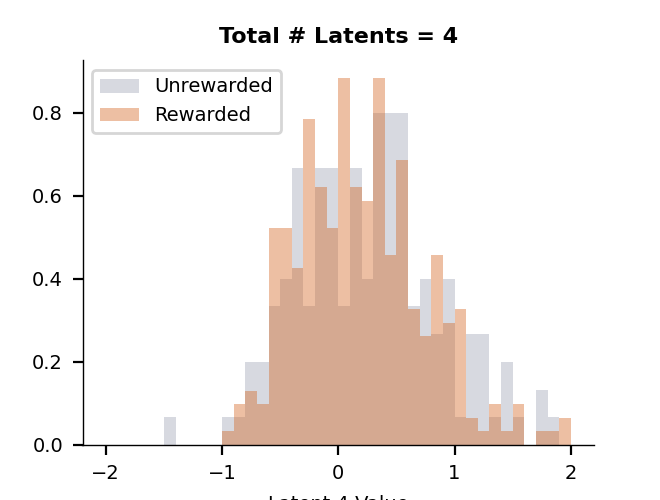

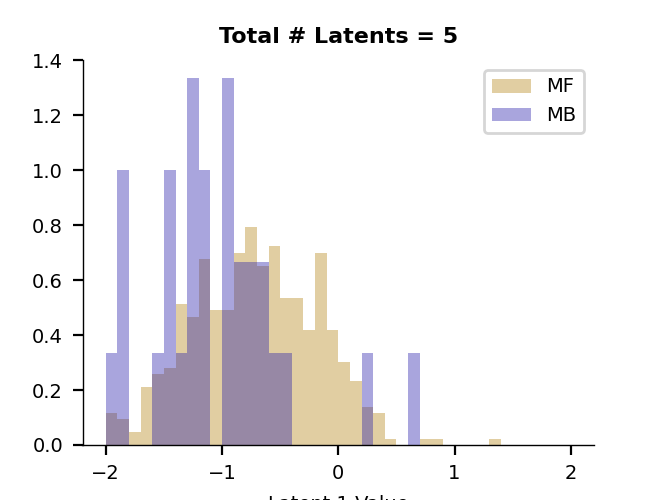

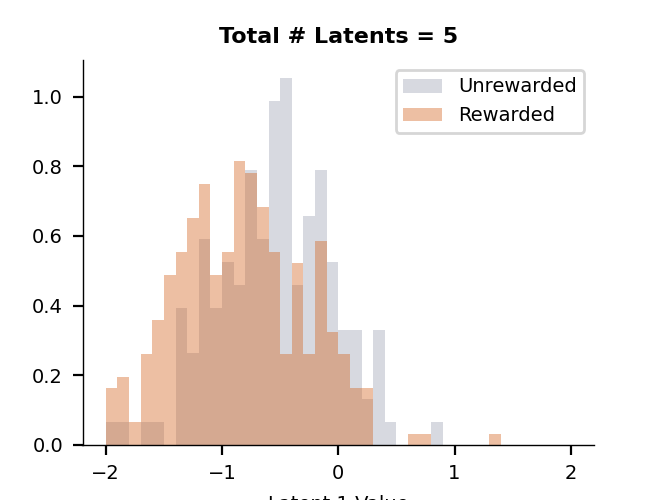

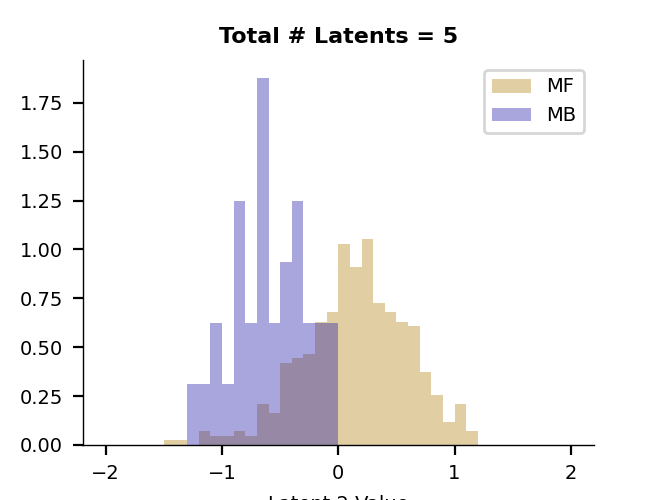

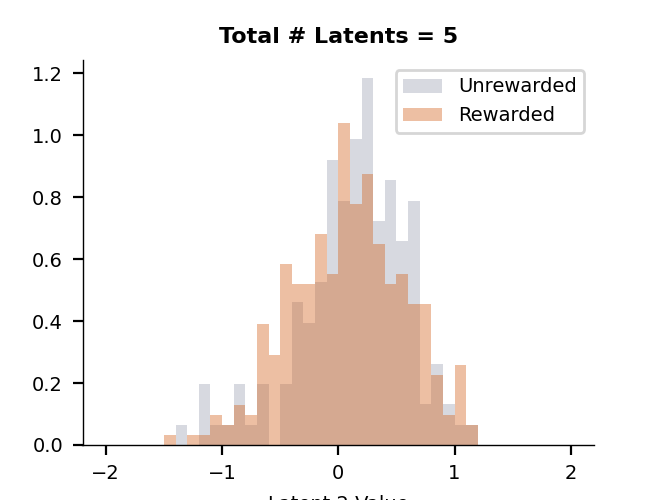

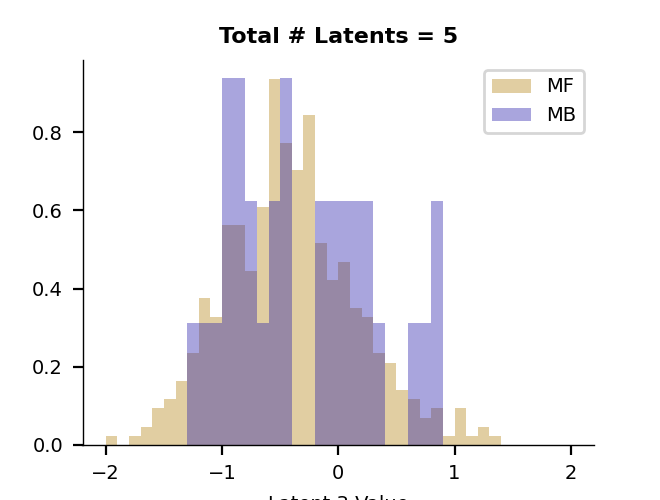

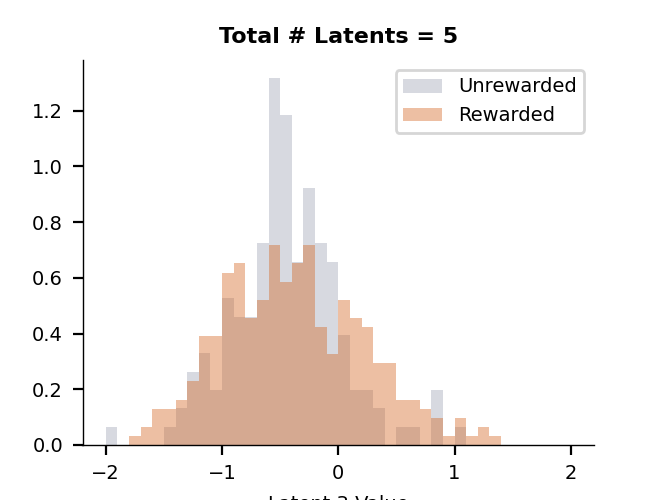

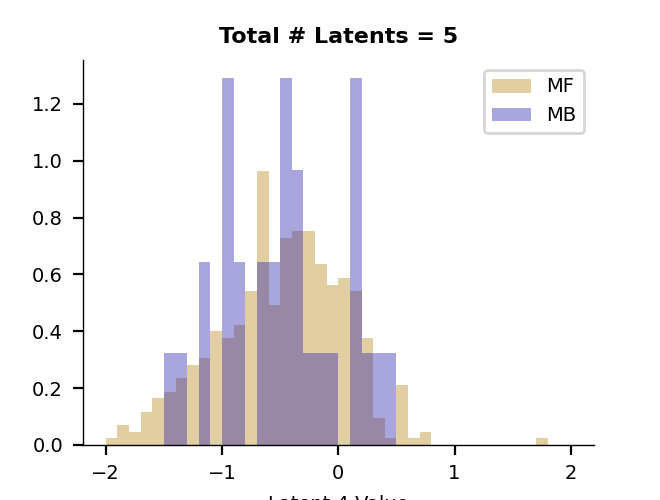

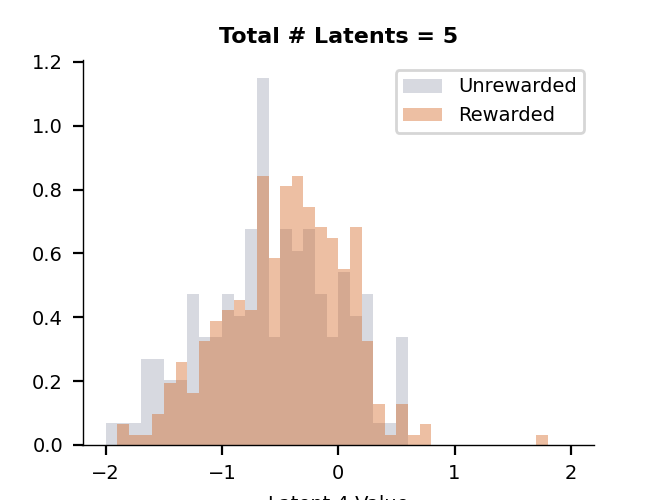

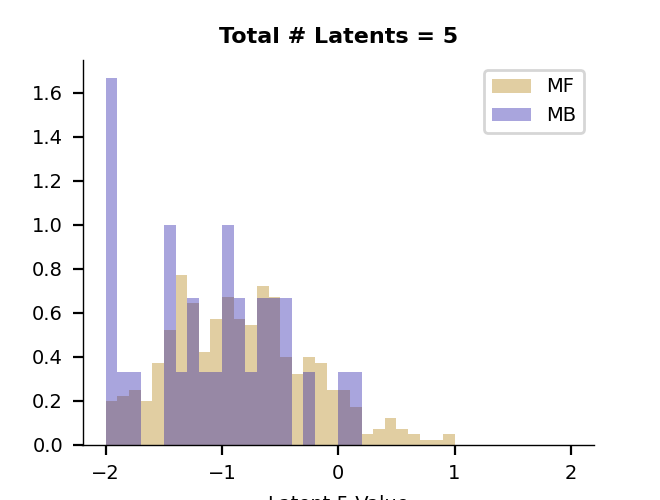

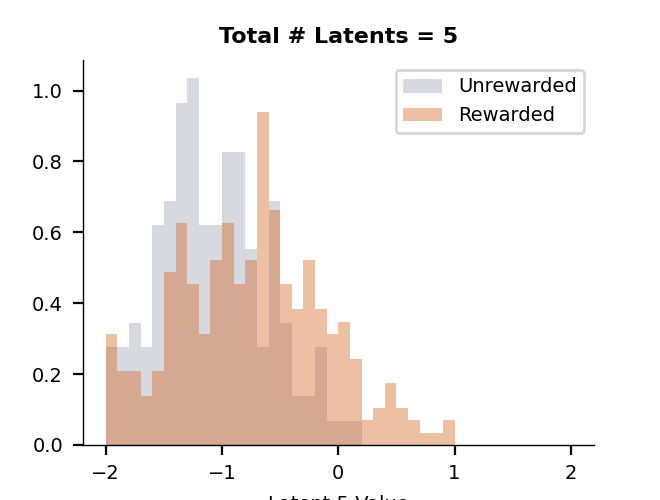

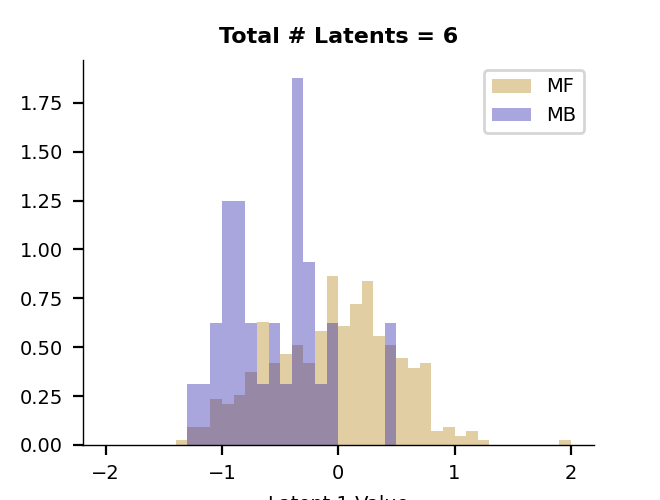

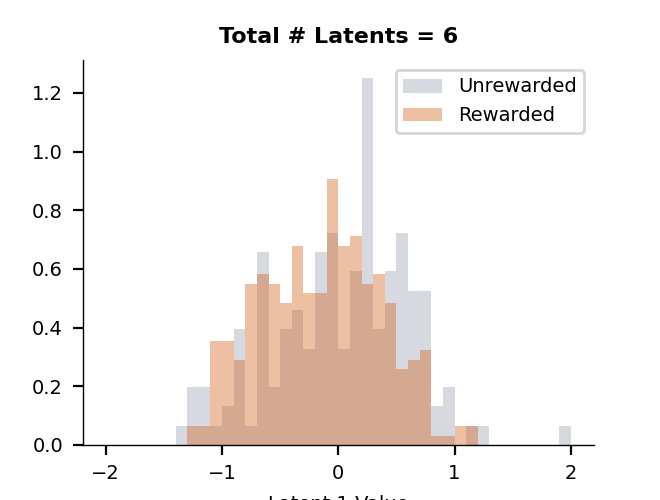

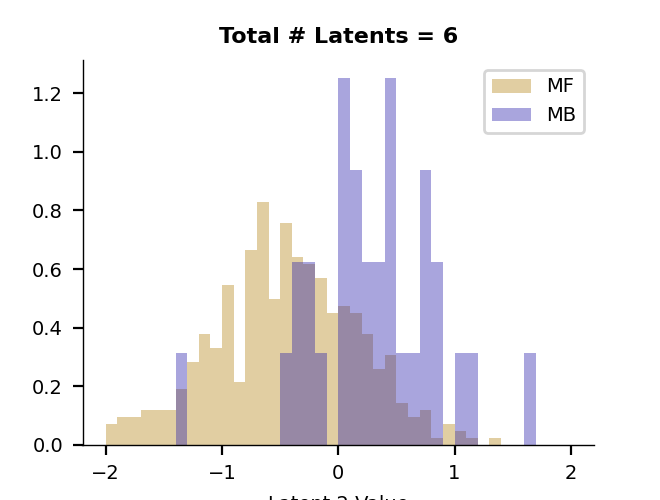

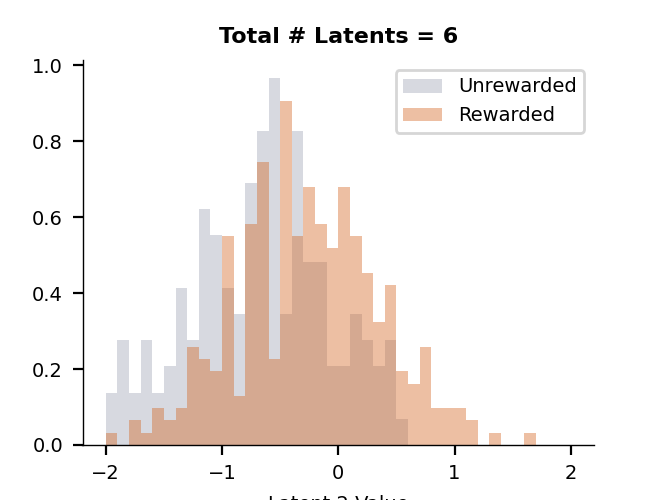

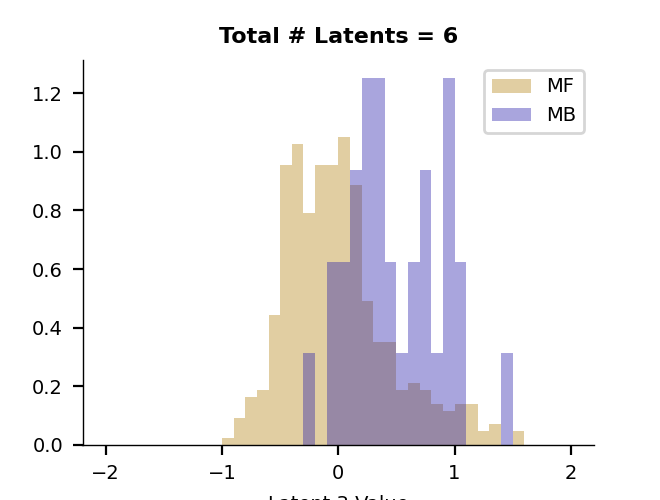

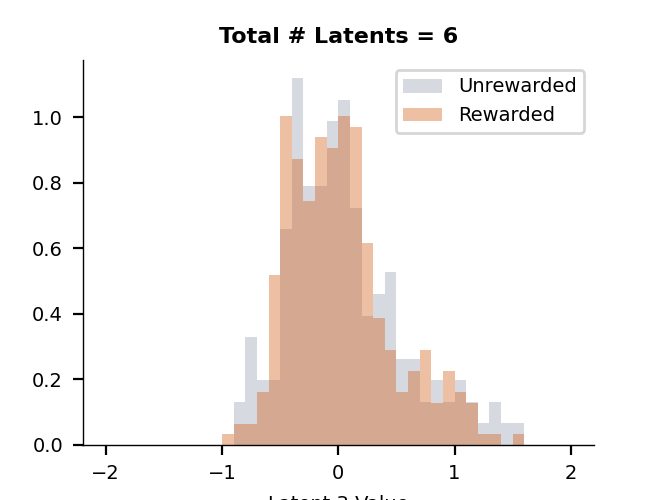

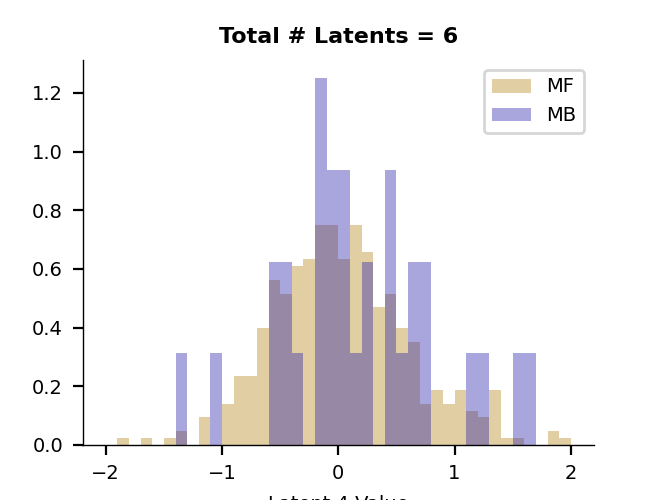

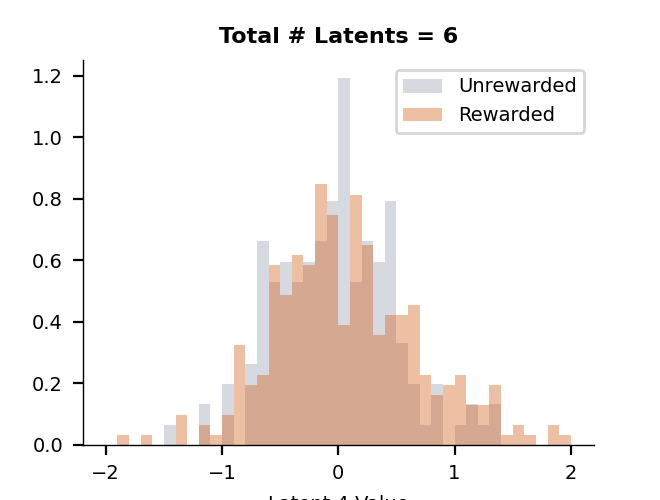

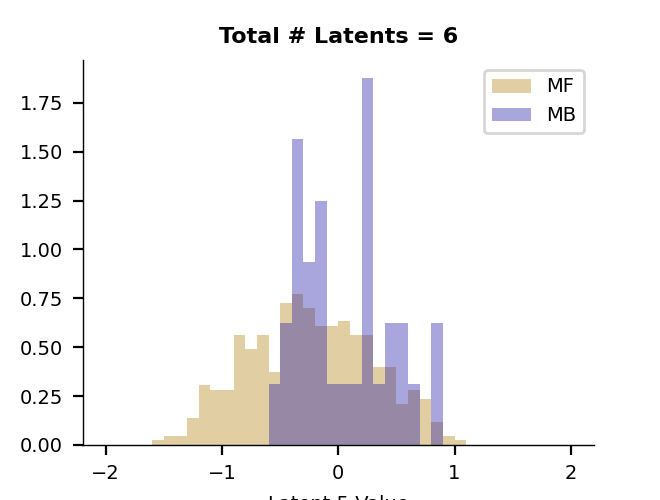

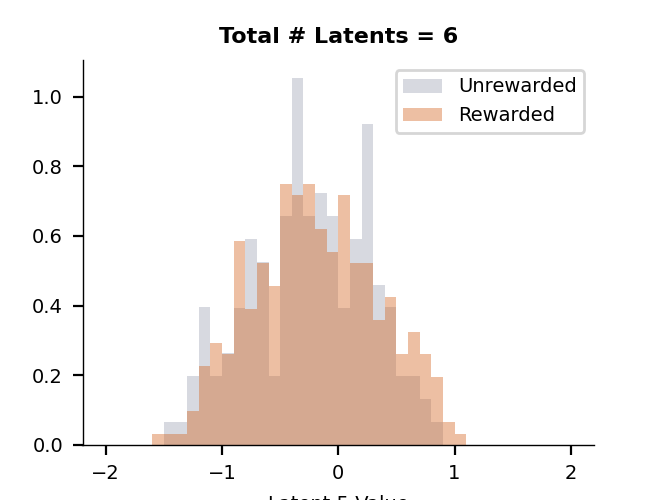

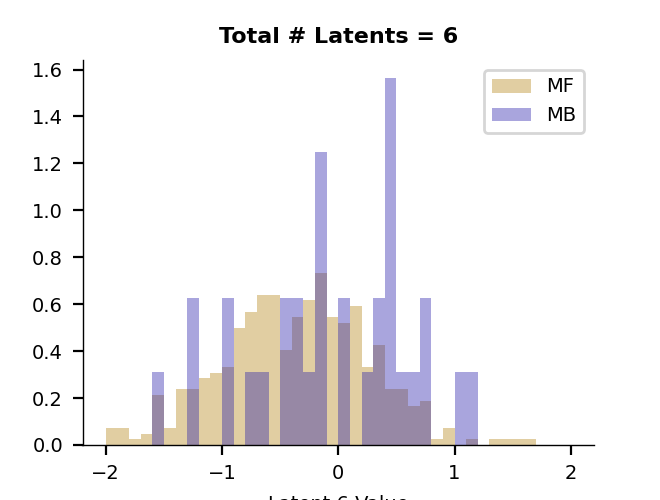

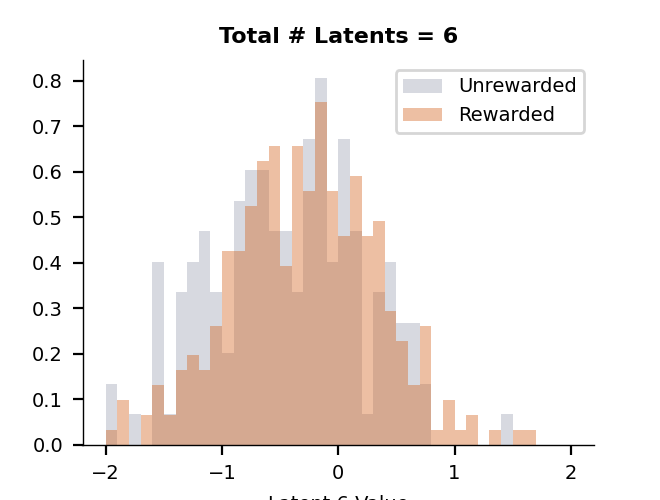

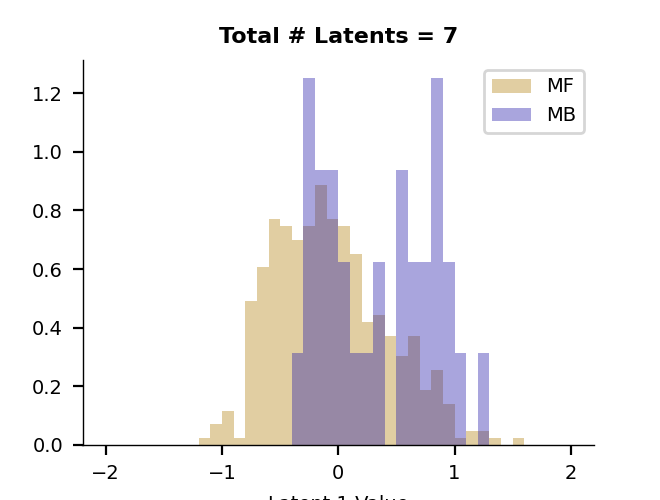

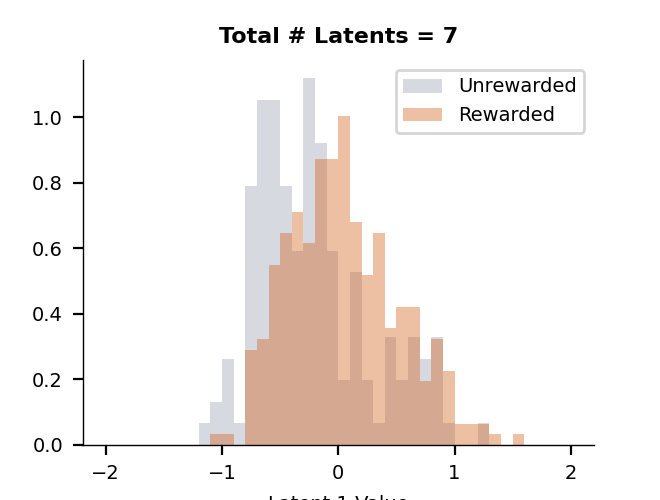

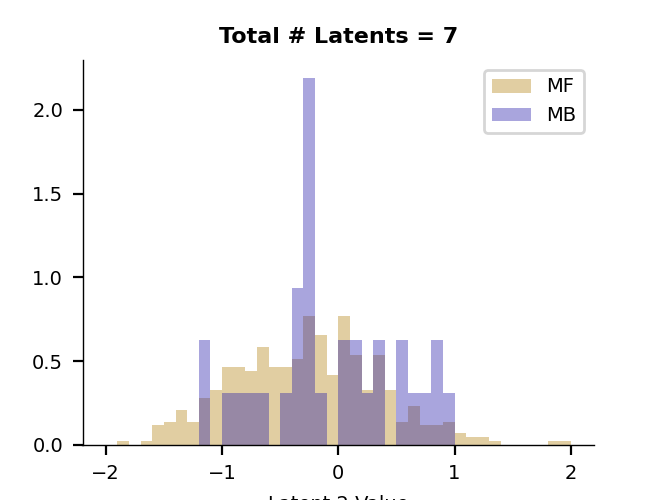

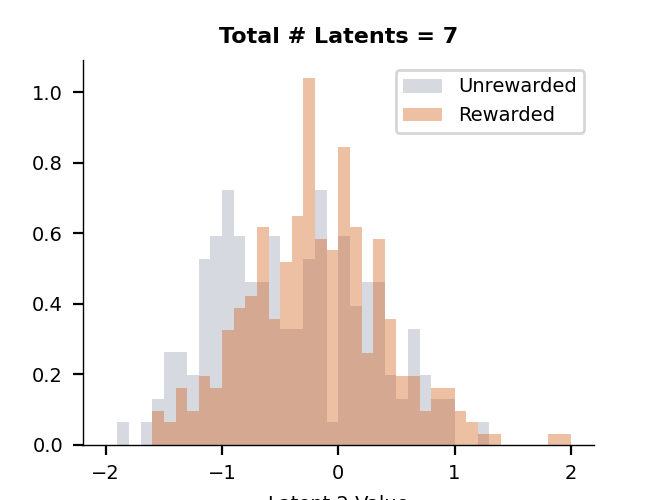

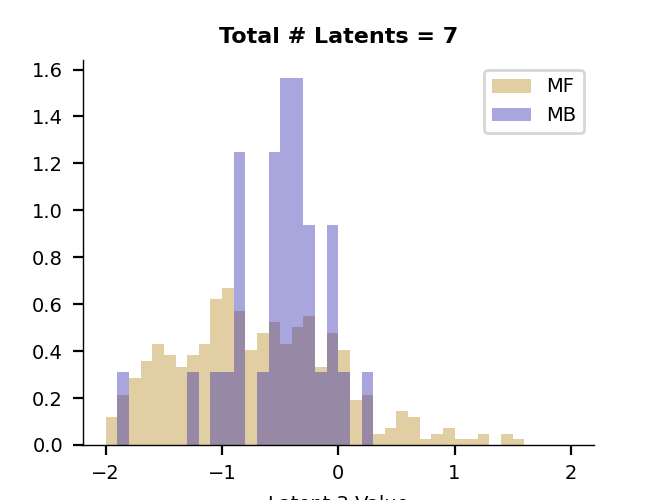

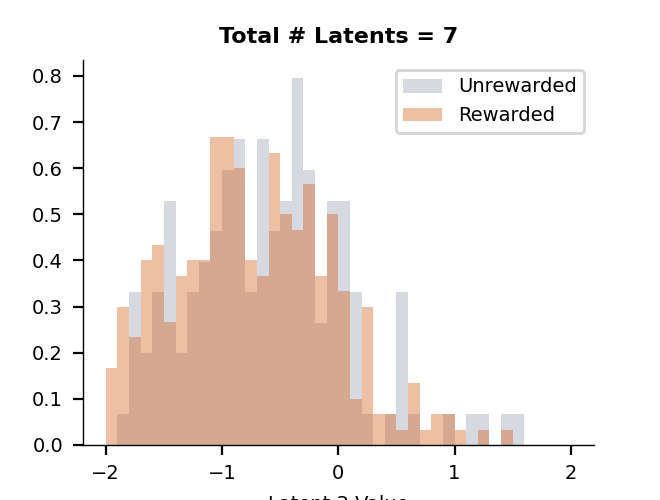

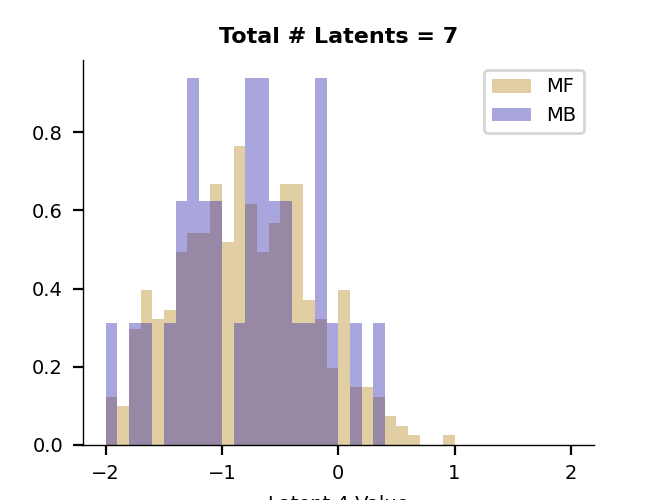

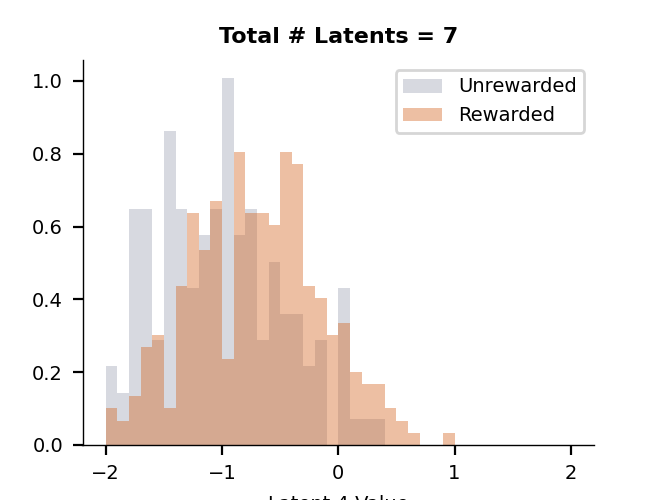

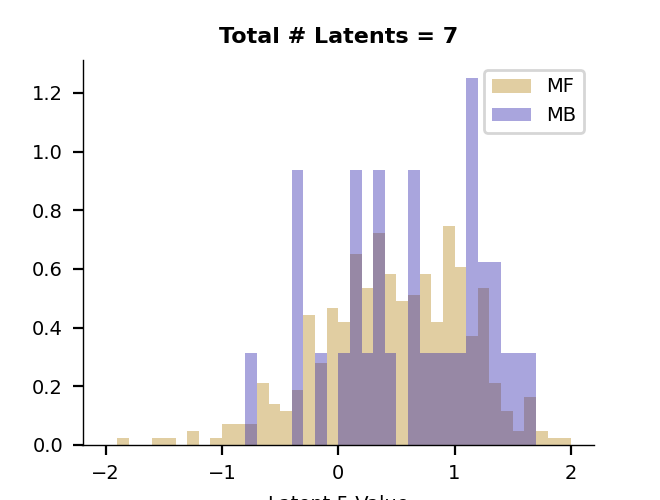

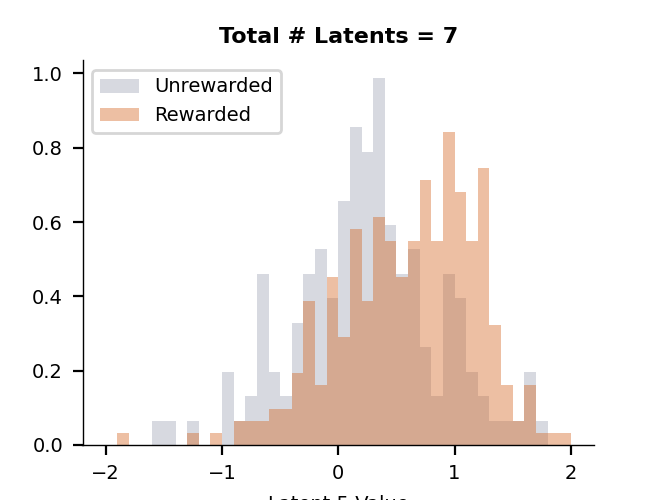

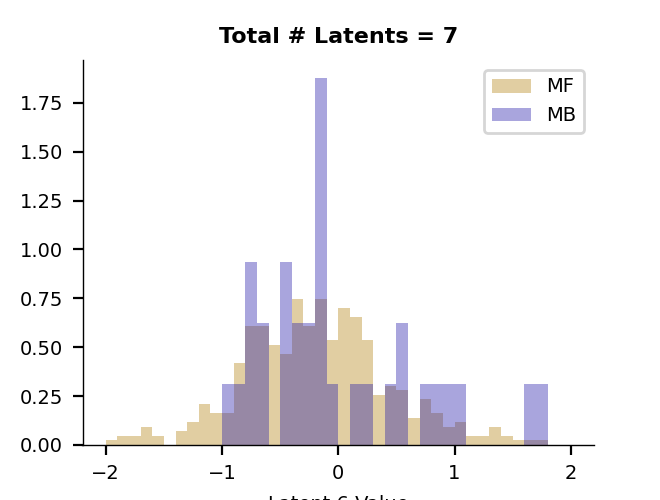

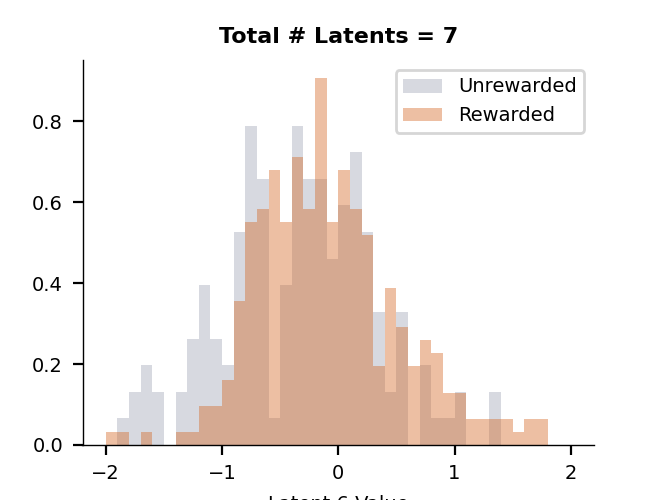

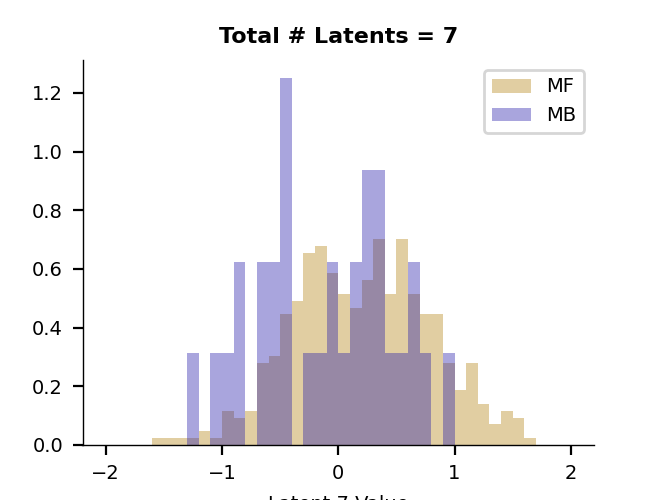

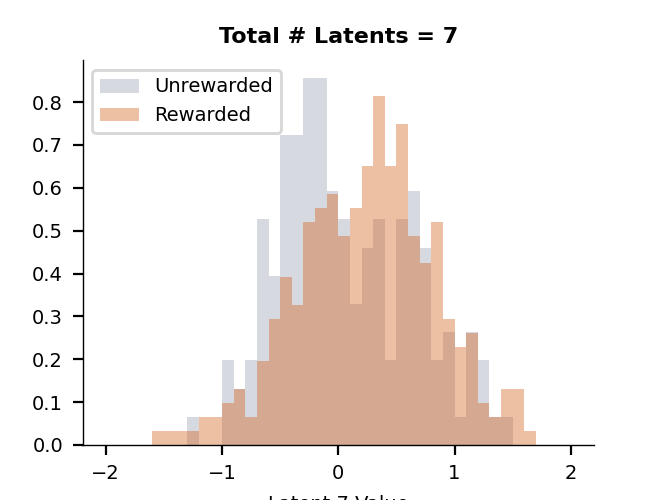

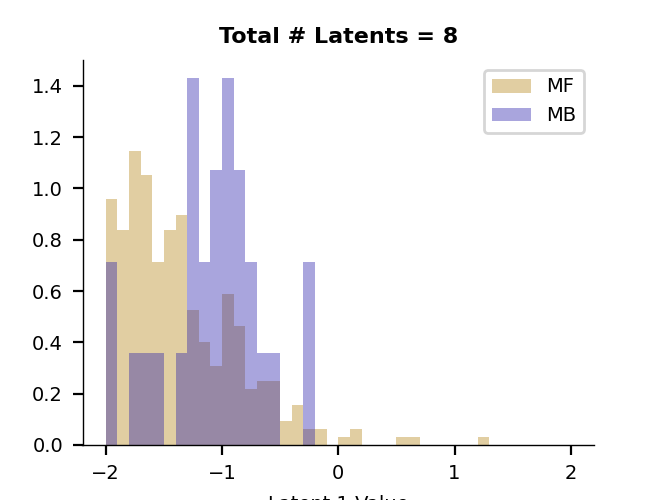

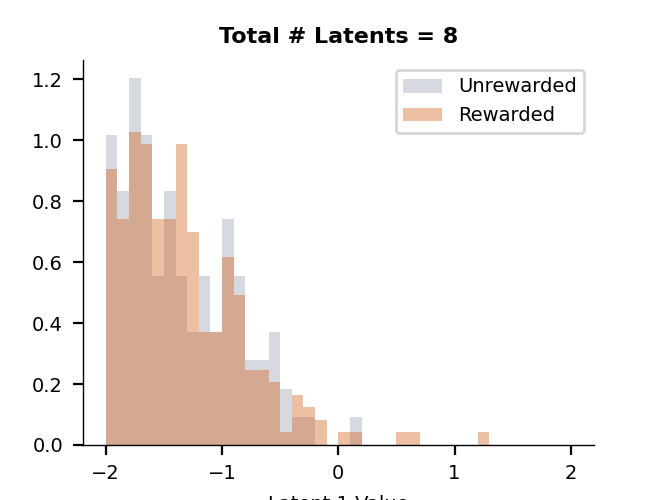

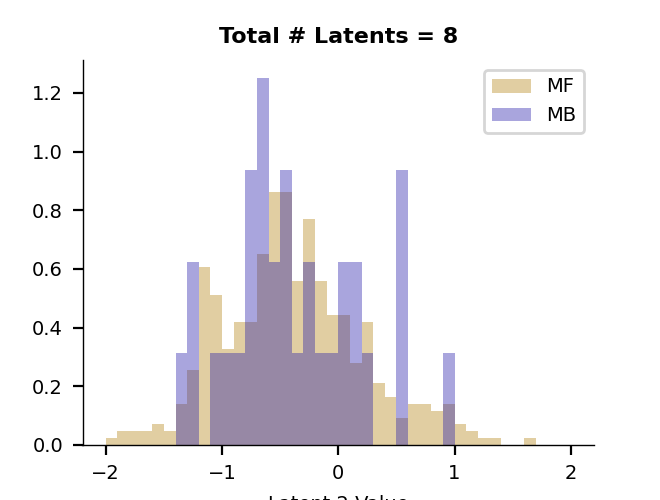

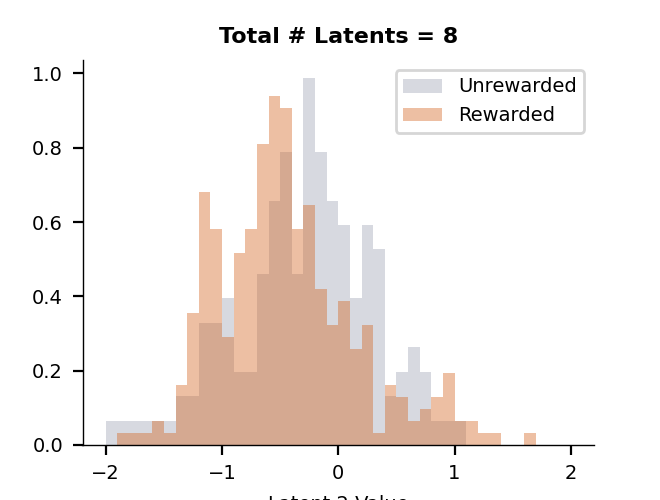

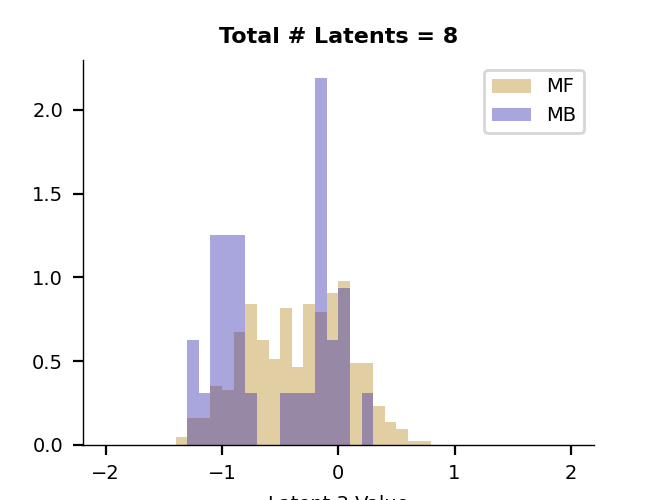

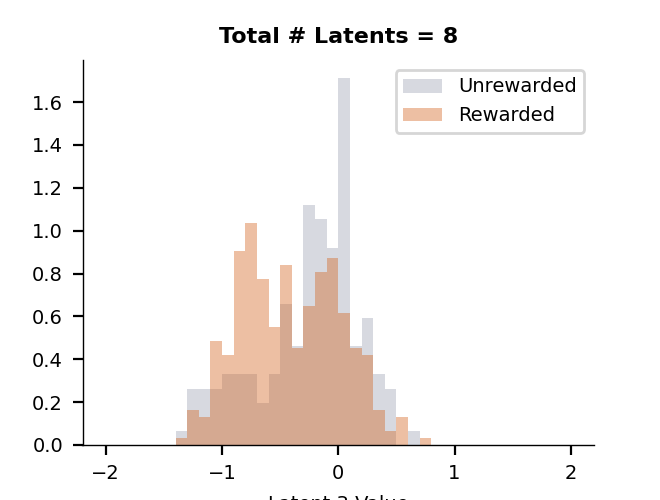

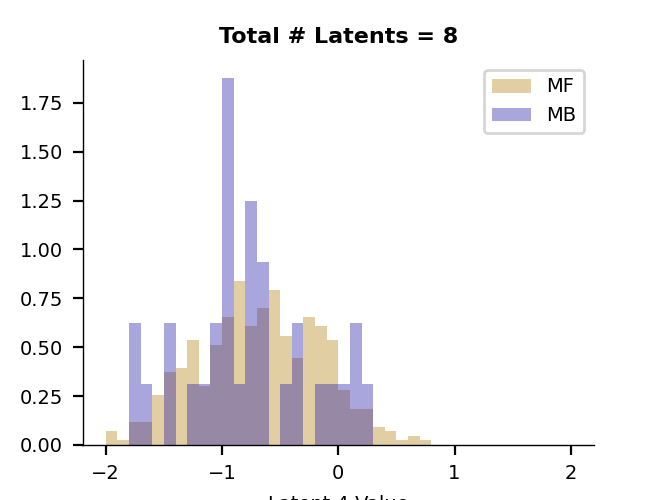

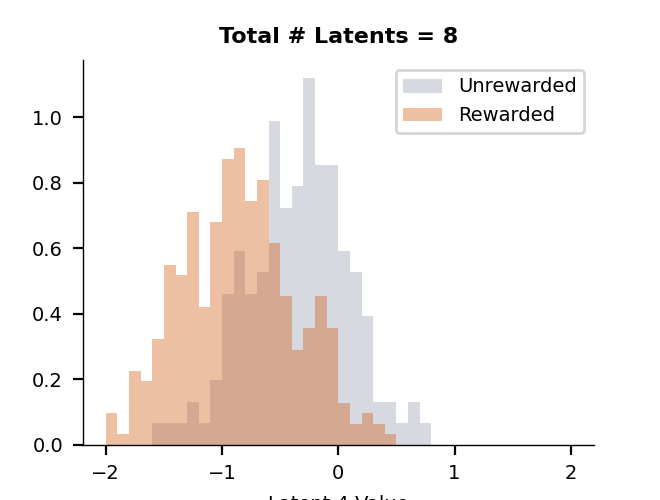

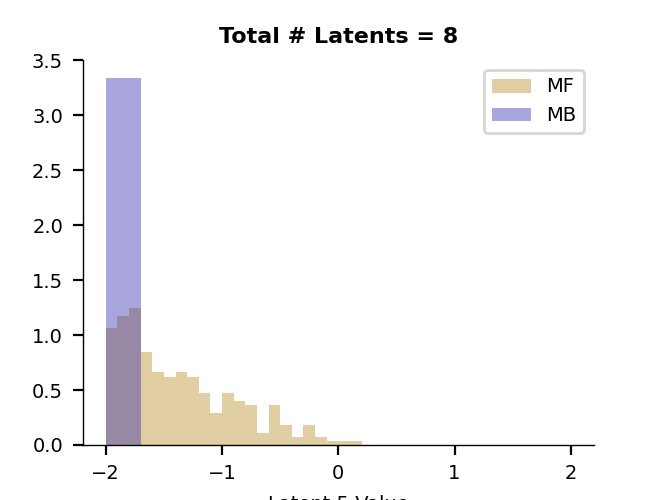

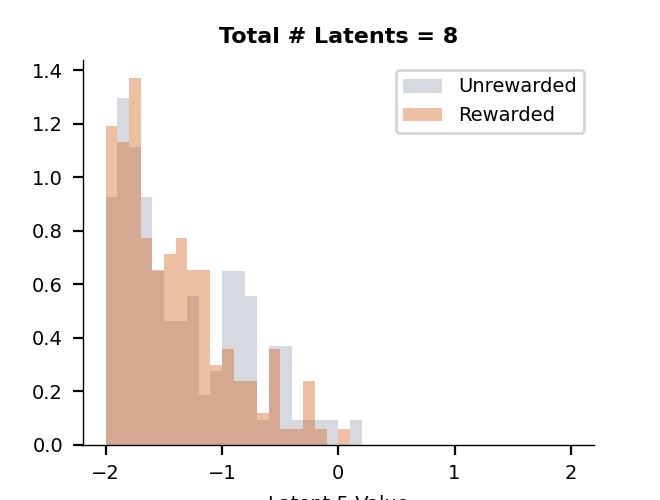

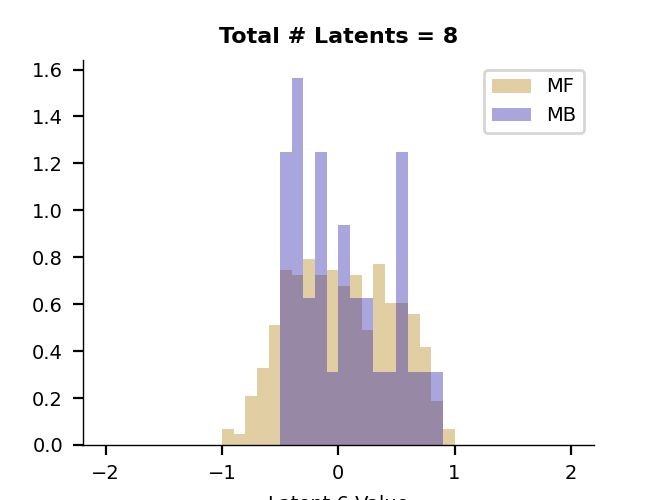

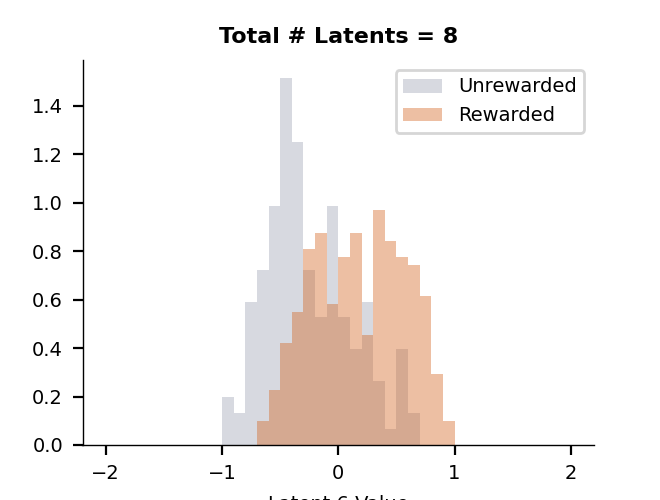

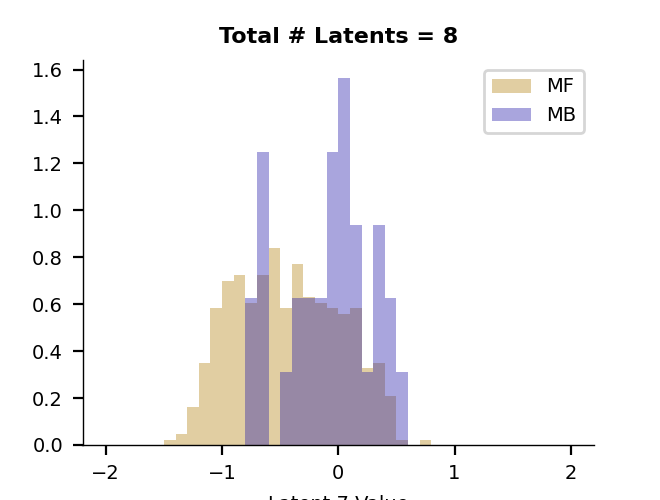

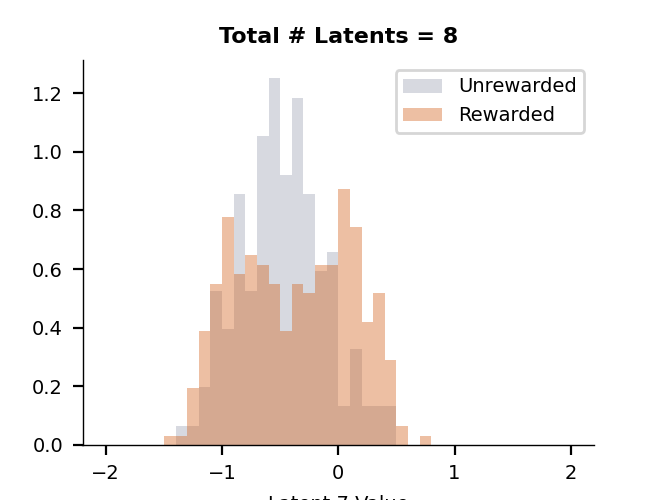

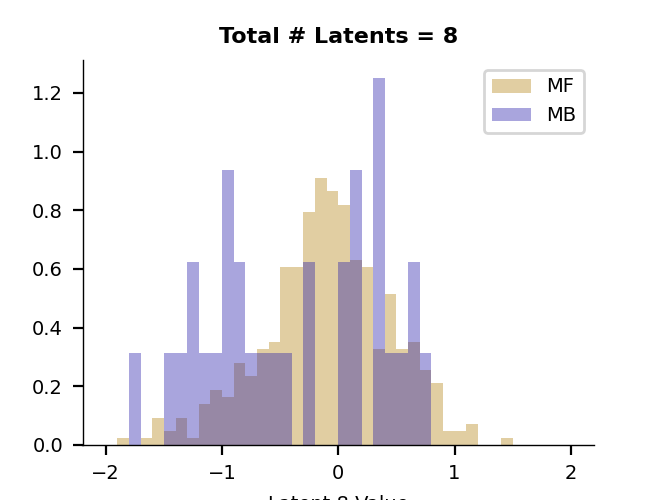

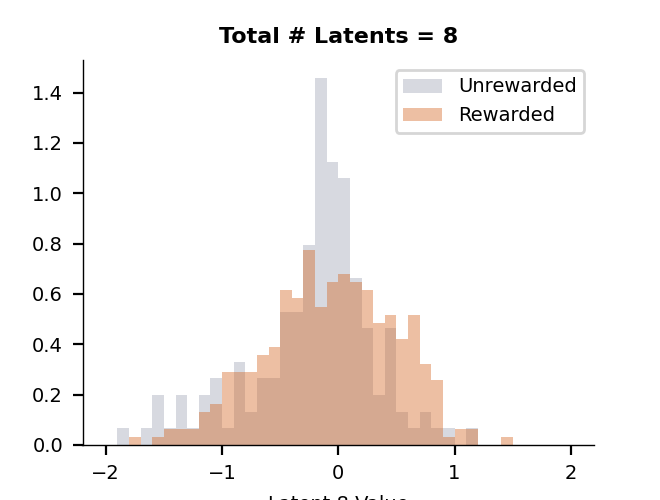

In [44]:

for latent in range(1,8+1):
    for latent_idx in range(latent):
        das = das_02[latent-1]
        model = das['affineae']['model']
        robs = das['data']['robs'][:,das['affineae']['model'].cids]
        strat = das['data']['strategy']
        rewarded = das['data']['rewarded']

        zgain = model.gain_mu.get_weights()[:,latent_idx]

        plt.figure()
        plt.hist(zgain[strat==0], alpha=0.4, bins=np.linspace(-2, 2, 41), density=True, color="#B58517", label="MF")
        plt.hist(zgain[strat==1], alpha=0.4, bins=np.linspace(-2, 2, 41), density=True, color="#2A20AA", label="MB")
        plt.xlabel(f"Latent {latent_idx+1} Value"); plt.legend()
        plt.title(f"Total # Latents = {latent}")
        plt.show()

        plt.figure()
        plt.hist(zgain[rewarded==0], alpha=0.4, bins=np.linspace(-2, 2, 41), density=True, color="#9CA1B2", label="Unrewarded")
        plt.hist(zgain[rewarded==1], alpha=0.4, bins=np.linspace(-2, 2, 41), density=True, color="#D2611B", label="Rewarded")
        plt.xlabel(f"Latent {latent_idx+1} Value"); plt.legend()
        plt.title(f"Total # Latents = {latent}")
        plt.show()